# Index
1. [HPC-Oda](#hpc-oda)
    1. [Cpu cycles](#Cpu_cycles)
    2. [Power](#power)
    3. [Instructions](#instructions)
    4. [Cache misses](#cache_misses)
    5. [Mixed data](#mixed_data)
    6. [Generated data](#generated_data)
2. [PM-100](pm-100)
    1. [DF_COMPLETED](#df_completed)
    2. [Time](#time)
    3. [Cores Alloc](#cores)
    4. [Nodes Alloc](#nodes)
    5. [Memory Alloc](#memory)
    6. [Power](#power_data)
    7. [GPU alloc](#gpu)
    8. [Mixed data](#various)

In [18]:
import random

def generate_task_set(L, Tdown, Tup, DoTdown, DoTup, Udown, Uup, Zdown, Zup):
    task_set = []

    for _ in range(L):
        # Randomly choose a period in [Tdown, Tup]
        period = random.uniform(Tdown, Tup)

        # Randomly choose a ratio in [DoTdown, DoTup] for relative deadline
        relative_deadline_ratio = random.uniform(DoTdown, DoTup)
        deadline = period * relative_deadline_ratio

        # Randomly choose a utilization in [Udown, Uup]
        utilization = random.uniform(Udown, Uup)
        execution_time_L = utilization * period

        # Generate execution times on different criticality levels using Zdown and Zup
        execution_times = [execution_time_L]
        for _ in range(1, L):
            level_ratio = random.uniform(Zdown, Zup)
            execution_time_L = execution_time_L * level_ratio
            execution_times.append(execution_time_L)

        task = {
            'period': period,
            'deadline': deadline,
            'utilization': utilization,
            'execution_times': execution_times
        }

        task_set.append(task)

    return task_set


def generate_experiment(num_experiments, L, Tdown, Tup, DoTdown, DoTup, Udown, Uup, Zdown, Zup):
    experiment_results = []

    for _ in range(num_experiments):
        task_set = generate_task_set(L, Tdown, Tup, DoTdown, DoTup, Udown, Uup, Zdown, Zup)
        experiment_results.append(task_set)

    return experiment_results

# Example usage
num_experiments = 5
L = 4
Tdown, Tup = 5, 20
DoTdown, DoTup = 0.8, 1.2
Udown, Uup = 0.1, 0.5
Zdown, Zup = 0.8, 1.2

experiment_results = generate_experiment(num_experiments, L, Tdown, Tup, DoTdown, DoTup, Udown, Uup, Zdown, Zup)

# Print the generated experiment results
for i, task_set in enumerate(experiment_results):
    print(f"Experiment {i + 1}:")
    for j, task in enumerate(task_set):
        print(f"Task {j + 1}: {task}")
    print("\n")


Experiment 1:
Task 1: {'period': 9.411410747662227, 'deadline': 9.982690670608585, 'utilization': 0.31597178452000635, 'execution_times': [2.973740248789601, 2.696888768273353, 2.2710855684922504, 1.9295616177016788]}
Task 2: {'period': 18.336069068204267, 'deadline': 18.11385364888792, 'utilization': 0.4760810725067379, 'execution_times': [8.72945542754831, 7.6340403664298, 8.130193775735448, 9.70190382378488]}
Task 3: {'period': 5.415565909567444, 'deadline': 6.265681005837409, 'utilization': 0.40729173700140997, 'execution_times': [2.2057152461533454, 2.3404489697470185, 2.2325807513370646, 2.0276653384593466]}
Task 4: {'period': 17.881616262758065, 'deadline': 15.223400851587606, 'utilization': 0.23330445786403153, 'execution_times': [4.17186078791542, 3.8276300115755797, 3.294991999705498, 3.7574332291698833]}


Experiment 2:
Task 1: {'period': 6.27127349990911, 'deadline': 5.422589576304347, 'utilization': 0.18189987828417023, 'execution_times': [1.1407438863202095, 1.00576955279

In [19]:
##SIMPLE APPROACH
import csv
import random

def generate_workload(num_tasks, output_csv):
    taskload = []
    workload = []

    execution_times = []
    energy_consumptions = []

    for i in range(1, 11):
        Ubound = random.uniform(0.4, 1.0)
        Td = random.uniform(0.1, 19.9)
        Tu = random.uniform(Td, 20)
        Ud = random.uniform(0.1, 0.9)
        Uu = random.uniform(Ud, 1.0)
        Zd = random.uniform(1, 4.9)
        Zu = random.uniform(Zd, 5)
        P = random.uniform(0.01, 1)

        for _ in range(num_tasks):
            Ti = random.uniform(Td, Tu)
            ui = random.uniform(Ud, Uu)
            is_HI_criticality = random.random() < P

            if is_HI_criticality:
                execution_time = ui * Ti
            else:
                execution_time = random.uniform(Zd, Zu) * ui * Ti

            cluster_power = 17.5  # kW
            power_factor = random.uniform(0.9, 1)
            energy_consumption = cluster_power * power_factor * execution_time

            execution_times.append(execution_time)
            energy_consumptions.append(energy_consumption)

            task = {
                'execution_time': execution_time,
                'energy_consumption': energy_consumption
            }

            taskload.append(task)

    workload.append(taskload)

    # Save execution times and energy consumptions to CSV file
    with open(output_csv, 'w', newline='') as csvfile:
        fieldnames = ['execution_time', 'energy_consumption']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for i in range(len(execution_times)):
            writer.writerow({'execution_time': execution_times[i], 'energy_consumption': energy_consumptions[i]})

    return workload


num_tasks = 5
output_csv = 'task_execution_energy.csv'  # Change this to your desired output file name
workload = generate_workload(num_tasks, output_csv)




In [20]:
import csv
import random

def generate_workload(num_tasks, output_csv):
    taskload = []
    workload = []

    execution_times = []
    energy_consumptions = []

    # Simulate dynamic workloads
    for i in range(1, 11):
        Ubound = random.uniform(0.4, 1.0)
        Td = random.uniform(0.1, 19.9)
        Tu = random.uniform(Td, 20)
        Ud = random.uniform(0.1, 0.9)
        Uu = random.uniform(Ud, 1.0)
        Zd = random.uniform(1, 4.9)
        Zu = random.uniform(Zd, 5)
        P = random.uniform(0.01, 1)

        dependencies = []  # Store task dependencies

        print(f"Workload {i}:")
        for _ in range(num_tasks):
            # Introduce dependency
            if dependencies:
                Ti = random.uniform(max(dependencies), Tu)  # Task cannot start until dependent tasks finish
            else:
                Ti = random.uniform(Td, Tu)
            ui = random.uniform(Ud, Uu)
            is_HI_criticality = random.random() < P

            if is_HI_criticality:
                execution_time = ui * Ti
            else:
                execution_time = random.uniform(Zd, Zu) * ui * Ti

            cluster_power = 17.5  # kW
            power_factor = random.uniform(0.9, 1)
            energy_consumption = cluster_power * power_factor * execution_time

            execution_times.append(execution_time)
            energy_consumptions.append(energy_consumption)

            task = {
                'execution_time': execution_time,
                'energy_consumption': energy_consumption
            }

            taskload.append(task)
            dependencies.append(Ti)  # Update dependencies

            # Print task details
            print(f"Task {len(taskload)} - Execution Time: {execution_time}, Energy Consumption: {energy_consumption}")

        workload.append(taskload)

    # Save execution times and energy consumptions to CSV file
    with open(output_csv, 'w', newline='') as csvfile:
        fieldnames = ['execution_time', 'energy_consumption']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for i in range(len(execution_times)):
            writer.writerow({'execution_time': execution_times[i], 'energy_consumption': energy_consumptions[i]})

    return workload


num_tasks = 5
output_csv = 'task_execution_energy.csv'  # Change this to your desired output file name
workload = generate_workload(num_tasks, output_csv)




Workload 1:
Task 1 - Execution Time: 10.37307300770242, Energy Consumption: 165.00298391946703
Task 2 - Execution Time: 2.1827519478657993, Energy Consumption: 36.17782687919698
Task 3 - Execution Time: 3.758391499965832, Energy Consumption: 60.1564794228434
Task 4 - Execution Time: 18.436117514179188, Energy Consumption: 312.3844224664628
Task 5 - Execution Time: 8.90311864963471, Energy Consumption: 153.489749357616
Workload 2:
Task 6 - Execution Time: 2.2269845402195263, Energy Consumption: 38.88685664579019
Task 7 - Execution Time: 7.140310378235476, Energy Consumption: 121.20561102087187
Task 8 - Execution Time: 6.6405838060304685, Energy Consumption: 106.53963918073046
Task 9 - Execution Time: 9.121534346587465, Energy Consumption: 147.29557565724113
Task 10 - Execution Time: 25.817673393268596, Energy Consumption: 450.90834540276137
Workload 3:
Task 11 - Execution Time: 28.55006801170438, Energy Consumption: 451.73990664747095
Task 12 - Execution Time: 24.94821523051437, Energy 

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the CSV file
csv_file = 'task_execution_energy.csv'
data = pd.read_csv("C://Users/Nuno/task_execution_energy.csv")
print (data)

# Split the data into features (X) and target variables (y)
X = data.drop('energy_consumption', axis=1)  # Features
y = data['energy_consumption']  # Target variable


    execution_time  energy_consumption
0        10.373073          165.002984
1         2.182752           36.177827
2         3.758391           60.156479
3        18.436118          312.384422
4         8.903119          153.489749
5         2.226985           38.886857
6         7.140310          121.205611
7         6.640584          106.539639
8         9.121534          147.295576
9        25.817673          450.908345
10       28.550068          451.739907
11       24.948215          401.388137
12       23.488849          389.964186
13       17.076927          279.419506
14       30.728768          496.540995
15       15.107237          256.363506
16       15.721244          273.141330
17       59.274536          986.964675
18       13.919170          226.181711
19       16.491063          265.987867
20       24.695049          391.147331
21       44.382803          726.567586
22       43.664703          698.824163
23        8.656137          151.352494
24       37.888341       

<a id="hpc-oda"></a>
# HPC-ODA


**HPC-ODA dataset:** [hyperlinks](https://zenodo.org/records/4671477)

###### Em uso: Cpu cycles, Instructions, Cache misses, Power Consumption,  Branch instructions, branch missses




In [1]:
### HPC_ODA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns 
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
file_path = 'C://Users/Nuno/responses.csv'

# Import only the second column from the CSV file, skipping the first row
power_data = pd.read_csv('C://Users/Nuno/HPC-ODA/power_prediction/responses/responses.csv', skiprows=1, usecols=[1], header=None, names=['y'])
cache_misses_data = pd.read_csv('C://Users/Nuno/HPC-ODA/power_prediction/sensors/node0.cache-misses.csv', skiprows=1, usecols=[1], header=None, names=['y'])
branch_instructions_data = pd.read_csv('C://Users/Nuno/HPC-ODA/power_prediction/sensors/node0.branch-instructions.csv', skiprows=1, usecols=[1], header=None, names=['y']) ##These are branch instructions.
branch_misses_data = pd.read_csv('C://Users/Nuno/HPC-ODA/power_prediction/sensors/node0.branch-misses.csv', skiprows=1, usecols=[1], header=None, names=['y']) ##These are branch instructions.
cpu_cycles_data = pd.read_csv('C://Users/Nuno/HPC-ODA/power_prediction/sensors/node0.cpu-cycles.csv', skiprows=1, usecols=[1], header=None, names=['y'])
instructions_data = pd.read_csv('C://Users/Nuno/HPC-ODA/power_prediction/sensors/node0.instructions.csv', skiprows=1, usecols=[1], header=None, names=['y']) ##These are instructions.

# Convert the x values to datetime
##data['x'] = pd.to_datetime(data['x'], unit='ns')# Extract values from the 'y' column and store them in a NumPy array
power = power_data['y'].values
cache_misses = cache_misses_data['y'].values
instructions = instructions_data['y'].values
cpu_cycles = cpu_cycles_data['y'].values
branch_instructions = branch_instructions_data['y'].values ##DUVIDA DE IMPORTANCIA
branch_misses = branch_misses_data['y'].values

##plt.hist(y, bins=num_bins, color='skyblue', edgecolor='black')
##plt.xlabel('Y Intervals')
##plt.ylabel('Frequency')
##plt.title('Histogram of Y Values with Intervals')
##plt.show()

In [2]:
combine_lists = list(zip(cpu_cycles,instructions,cache_misses,branch_instructions,branch_misses,power))

print (combine_lists[1])




(3121017, 63882, 7366, 57247, 2758, 86814)


In [2]:
##p = [int(x) for x in power]
power = np.array(power_data['y'])
cache_misses = np.array(cache_misses_data['y'])
instructions = np.array(instructions_data['y'])
cpu_cycles = np.array(cpu_cycles_data['y'])
branch_instructions = np.array(branch_instructions_data['y']) ##DUVIDA DE IMPORTANCIA
branch_misses = np.array(branch_misses_data['y'])


branch_instructions = branch_instructions[1:]
branch_misses = branch_misses[1:]

correlation_matrix = np.corrcoef(branch_instructions, branch_misses)

print("Correlation Matrix:")
print(correlation_matrix)

    

Correlation Matrix:
[[1.         0.16340395]
 [0.16340395 1.        ]]


In [4]:
res = []
for i in range(len(branch_instructions)):
    total = branch_instructions[i] / branch_misses[i]
    res.append(total)

    


In [ ]:
with open("output.txt", "w") as f:
    for item in res:
        f.write("%s\n" % item)

<a id="Cpu_cycles"></a>
## Cpu_cycles

In [ ]:
num_counts = {}
for num in cpu_cycles:
    if num in num_counts:
        num_counts[num] += 1
    else:
        num_counts[num] = 1

# Print the numbers and their counts
for num, count in num_counts.items():
    print(f"Number: {num}, Count: {count}")
    

Mean cpu_cyles Consumption: 83276011.86702478
Median cpu_cyles Consumption: 143882535.0
Standard Deviation of Power Consumption: 70773296.05597521
1st Quartile of cpu_cyles Consumption: 4422062.5
2nd Quartile of cpu_cyles Consumption: 143882535.0
3rd Quartile of cpu_cyles Consumption: 148854697.0
4th Quartile of cpu_cyles Consumption: 163572552


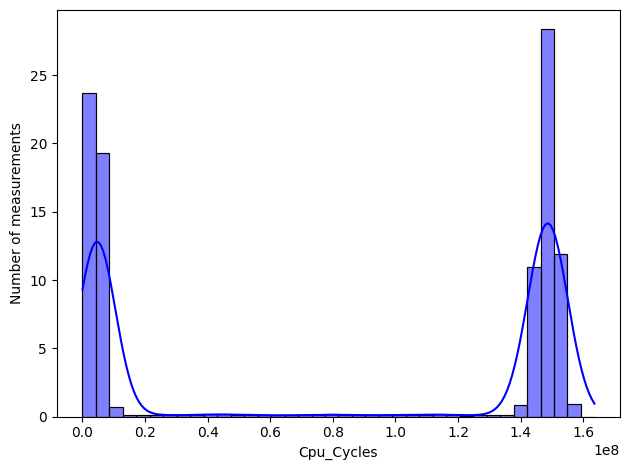

In [2]:
# Plot the distribution of power data
counts, bin_edges = np.histogram(cpu_cycles, bins='auto')

sns.histplot(
    cpu_cycles,
    kde=True,
    stat = "percent",
    log_scale=False,
    color='blue'  # specify the number of colors you need
)

plt.xlabel("Cpu_Cycles")
plt.ylabel("Number of measurements")
plt.tight_layout()

# Print statistics for power consumption
cpu_cycles_mean = np.mean(cpu_cycles)
cpu_cycles_median = np.median(cpu_cycles)
cpu_cycles_std = np.std(cpu_cycles)
cpu_cycles_q1 = np.quantile(cpu_cycles, 0.25)
cpu_cycles_q2 = np.quantile(cpu_cycles, 0.5)
cpu_cycles_q3 = np.quantile(cpu_cycles, 0.75)
cpu_cycles_q4 = np.quantile(cpu_cycles, 1)

print(f"Mean cpu_cyles Consumption: {cpu_cycles_mean}")
print(f"Median cpu_cyles Consumption: {cpu_cycles_median}")
print(f"Standard Deviation of Power Consumption: {cpu_cycles_std}")
print(f"1st Quartile of cpu_cyles Consumption: {cpu_cycles_q1}")
print(f"2nd Quartile of cpu_cyles Consumption: {cpu_cycles_q2}")
print(f"3rd Quartile of cpu_cyles Consumption: {cpu_cycles_q3}")
print(f"4th Quartile of cpu_cyles Consumption: {cpu_cycles_q4}")

plt.show()

In [ ]:
for i in range(len(bin_edges) - 1):
    bin_interval = (float(bin_edges[i]), float(bin_edges[i + 1]))
    # Convert percent to counts
    percentages = float(counts[i] / len(cpu_cycles)) * 100
    print(f"Bin Interval: {bin_interval}, Percentage: {percentages}")
    


In [ ]:
import scipy.stats as stats
kde = stats.gaussian_kde(cpu_cycles, bw_method=0.01)

print (kde)

C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


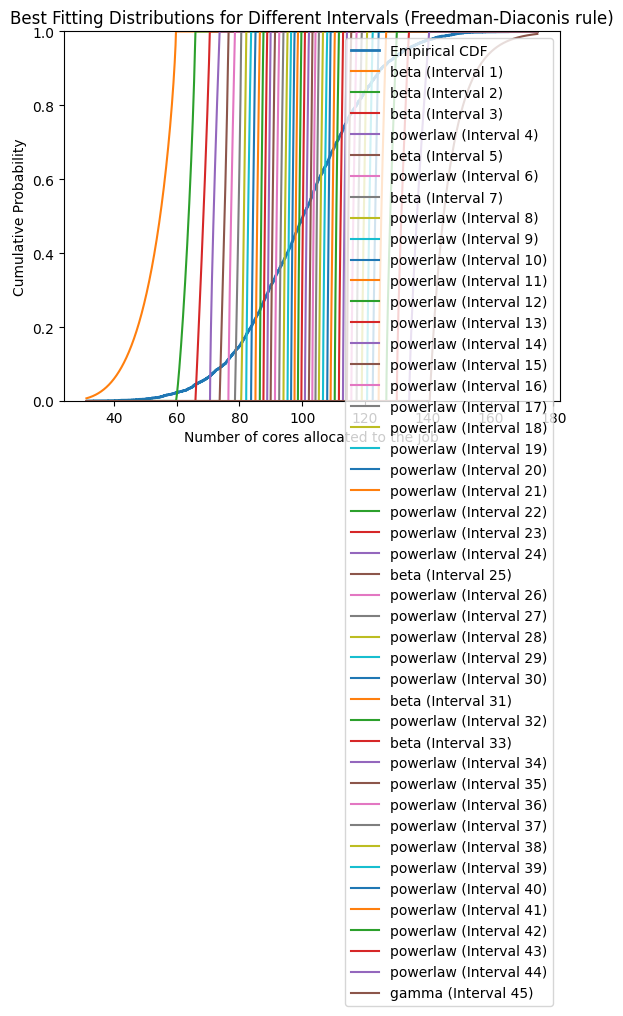

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Generate example CPU cycle data
cpu_cycles = np.random.normal(loc=100, scale=20, size=5000)  # Example data

# Use Freedman-Diaconis rule to determine optimal intervals
bin_width = 2 * stats.iqr(cpu_cycles) / np.power(len(cpu_cycles), 1/3)
num_bins = int((np.max(cpu_cycles) - np.min(cpu_cycles)) / bin_width)
intervals = np.array_split(np.sort(cpu_cycles), num_bins)

# Define candidate distributions
candidate_distributions = [
    stats.norm,    # Normal distribution
    stats.lognorm,  # Log-normal distribution
    stats.gamma,   # Gamma distribution
    stats.expon,   # Exponential distribution
    stats.beta,    # Beta distribution
    stats.uniform, # Uniform distribution
    stats.chi2,    # Chi-squared distribution
    stats.t,       # Student's t-distribution
    stats.f,       # F-distribution
    stats.weibull_min, # Weibull minimum distribution
    stats.logistic,   # Logistic distribution
    stats.triang,     # Triangular distribution
    stats.gumbel_r,   # Right-skewed Gumbel distribution
    stats.gumbel_l,   # Left-skewed Gumbel distribution
    stats.pearson3,   # Pearson type III distribution
    stats.powerlaw,   # Power-law distribution
]

# Initialize variables to store best fit distribution and corresponding parameters for each interval
best_fit_distributions = [None] * len(intervals)
best_fit_params = [None] * len(intervals)
best_aic = [np.inf] * len(intervals)

# Iterate over intervals
for i, interval in enumerate(intervals):
    # Initialize variables to store best fit distribution and parameters for current interval
    interval_best_fit_distribution = None
    interval_best_fit_params = None
    interval_best_aic = np.inf
    
    # Iterate over candidate distributions
    for distribution in candidate_distributions:
        # Fit the distribution to the interval
        params = distribution.fit(interval)
        
        # Calculate the log-likelihood
        log_likelihood = distribution.logpdf(interval, *params).sum()
        
        # Calculate AIC (Akaike Information Criterion)
        k = len(params)  # number of parameters in the distribution
        n = len(interval)  # number of data points in the interval
        aic = -2 * log_likelihood + 2 * k
        
        # Compare with the current best fit for this interval
        if aic < interval_best_aic:
            interval_best_fit_distribution = distribution
            interval_best_fit_params = params
            interval_best_aic = aic
    
    # Store the best fit distribution and parameters for this interval
    best_fit_distributions[i] = interval_best_fit_distribution
    best_fit_params[i] = interval_best_fit_params
    best_aic[i] = interval_best_aic

# Plot empirical CDF of actual data
sns.ecdfplot(cpu_cycles, label='Empirical CDF', linewidth=2)

# Plot fitted CDF of the best-fit distribution for each interval
x = np.linspace(np.min(cpu_cycles), np.max(cpu_cycles), 100000)
for i in range(len(intervals)):
    cdf_values = best_fit_distributions[i].cdf(x, *best_fit_params[i])
    plt.plot(x, cdf_values, label=best_fit_distributions[i].name + f' (Interval {i+1})')

plt.xlabel("Number of cores allocated to the job")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.title("Best Fitting Distributions for Different Intervals (Freedman-Diaconis rule)")
plt.show()


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


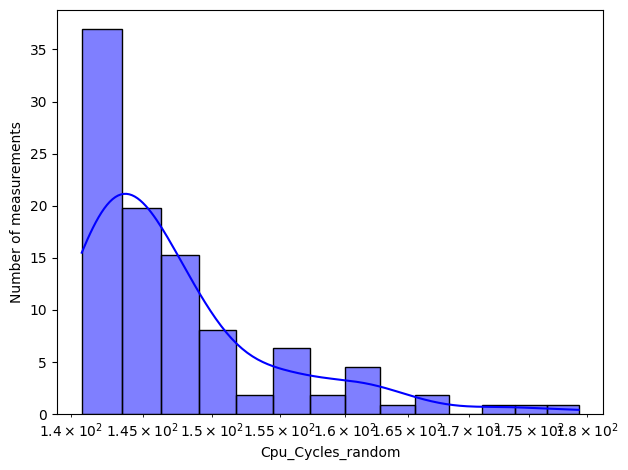

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Use Freedman-Diaconis rule to determine optimal intervals
bin_width = 2 * stats.iqr(cpu_cycles) / np.power(len(cpu_cycles), 1/3)
num_bins = int((np.max(cpu_cycles) - np.min(cpu_cycles)) / bin_width)
intervals = np.array_split(np.sort(cpu_cycles), num_bins)

# Define candidate distributions
candidate_distributions = [
    stats.norm,    # Normal distribution
    stats.lognorm,  # Log-normal distribution
    stats.gamma,   # Gamma distribution
    stats.expon,   # Exponential distribution
    stats.beta,    # Beta distribution
    stats.uniform, # Uniform distribution
    stats.chi2,    # Chi-squared distribution
    stats.t,       # Student's t-distribution
    stats.f,       # F-distribution
    stats.weibull_min, # Weibull minimum distribution
    stats.logistic,   # Logistic distribution
    stats.triang,     # Triangular distribution
    stats.gumbel_r,   # Right-skewed Gumbel distribution
    stats.gumbel_l,   # Left-skewed Gumbel distribution
    stats.pearson3,   # Pearson type III distribution
    stats.powerlaw,   # Power-law distribution
]

# Initialize variables to store best fit distribution and corresponding parameters for each interval
best_fit_distributions = [None] * len(intervals)
best_fit_params = [None] * len(intervals)
best_aic = [np.inf] * len(intervals)

# Initialize variables to store random values for each interval
interval_random_values = []

# Iterate over intervals
for i, interval in enumerate(intervals):
    # Initialize variables to store best fit distribution and parameters for current interval
    interval_best_fit_distribution = None
    interval_best_fit_params = None
    interval_best_aic = np.inf
    
    # Iterate over candidate distributions
    for distribution in candidate_distributions:
        # Fit the distribution to the interval
        params = distribution.fit(interval)
        
        # Calculate the log-likelihood
        log_likelihood = distribution.logpdf(interval, *params).sum()
        
        # Calculate AIC (Akaike Information Criterion)
        k = len(params)  # number of parameters in the distribution
        n = len(interval)  # number of data points in the interval
        aic = -2 * log_likelihood + 2 * k
        
        # Compare with the current best fit for this interval
        if aic < interval_best_aic:
            interval_best_fit_distribution = distribution
            interval_best_fit_params = params
            interval_best_aic = aic
    
    # Store the best fit distribution and parameters for this interval
    best_fit_distributions[i] = interval_best_fit_distribution
    best_fit_params[i] = interval_best_fit_params
    best_aic[i] = interval_best_aic
    
    # Generate random values from the best fit distribution for this interval
    random_values_cpu = interval_best_fit_distribution.rvs(size=len(interval), *interval_best_fit_params)
    interval_random_values.append(random_values_cpu)

# Plot empirical CDF of actual data
##sns.ecdfplot(cpu_cycles, label='Empirical CDF', linewidth=2)

# Plot fitted CDF of the best-fit distribution for each interval
x = np.linspace(np.min(cpu_cycles), np.max(cpu_cycles), 100000)
for i in range(len(intervals)):
    cdf_values = best_fit_distributions[i].cdf(x, *best_fit_params[i])
    ##plt.plot(x, cdf_values, label=best_fit_distributions[i].name + f' (Interval {i+1})')

##plt.xlabel("Number of cores allocated to the job")
##plt.ylabel("Cumulative Probability")
##plt.legend()
##plt.title("Best Fitting Distributions for Different Intervals (Freedman-Diaconis rule)")
##plt.show()


sns.histplot(
    random_values_cpu,
    stat = "percent",
    kde=True,
    log_scale=False,
    color='blue'  # specify the number of colors you need
)

plt.xlabel("Cpu_Cycles_random")
plt.ylabel("Number of measurements")
plt.xscale("log")
plt.tight_layout()

plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


random_values = cpu_cycles


# Fit and compare additional candidate distributions
candidate_distributions = [
    stats.norm,    # Normal distribution
    stats.lognorm,  # Log-normal distribution
    stats.gamma,   # Gamma distribution
    stats.expon,   # Exponential distribution
    stats.beta,    # Beta distribution
    stats.uniform, # Uniform distribution
    stats.chi2,    # Chi-squared distribution
    stats.t,       # Student's t-distribution
    stats.f,       # F-distribution
    stats.weibull_min, # Weibull minimum distribution
    stats.logistic,   # Logistic distribution
    stats.triang,     # Triangular distribution
    stats.gumbel_r,   # Right-skewed Gumbel distribution
    stats.gumbel_l,   # Left-skewed Gumbel distribution
    stats.pearson3,   # Pearson type III distribution
    stats.powerlaw,   # Power-law distribution
]

# Initialize variables to store best fit distribution and corresponding parameters
best_fit_distribution = None
best_fit_params = None
best_aic = np.inf

# Iterate over candidate distributions
for distribution in candidate_distributions:
    # Fit the distribution to the data
    params = distribution.fit(random_values)
    
    # Calculate the log-likelihood
    log_likelihood = distribution.logpdf(random_values, *params).sum()
    
    # Calculate AIC (Akaike Information Criterion)
    k = len(params)  # number of parameters in the distribution
    n = len(random_values)  # number of data points
    aic = -2 * log_likelihood + 2 * k
    
    # Compare with the current best fit
    if aic < best_aic:
        best_fit_distribution = distribution
        best_fit_params = params
        best_aic = aic

# Plot empirical CDF of actual data
sns.ecdfplot(random_values, label='Empirical CDF', linewidth=2)

# Plot fitted CDF of the best-fit distribution
x = np.linspace(np.min(random_values), np.max(random_values), 100000)
cdf_values = best_fit_distribution.cdf(x, *best_fit_params)
plt.plot(x, cdf_values, label=best_fit_distribution.name)

plt.xlabel("Number of cores allocated to the job")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.title(f"Best Fitting Distribution: {best_fit_distribution.name}")
plt.show()


<a id="power"></a>
## Power data

Mean Power Consumption: 153419.55222103372
Median Power Consumption: 165808.0
Standard Deviation of Power Consumption: 51595.14551315592
1st Quartile of Power Consumption: 121923.0
2nd Quartile of Power Consumption: 165808.0
3rd Quartile of Power Consumption: 188429.0
4th Quartile of Power Consumption: 350616


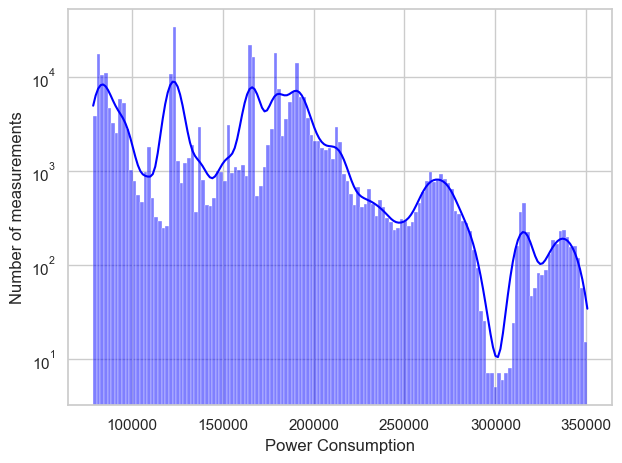

In [14]:
# Plot the distribution of power data
sns.histplot(
    power,
    kde=True,
    log_scale=False,
    color='blue'  # specify the number of colors you need
)

plt.xlabel("Power Consumption")
plt.ylabel("Number of measurements")
plt.yscale("log")
plt.tight_layout()

# Print statistics for power consumption
power_mean = np.mean(power)
power_median = np.median(power)
power_std = np.std(power)
power_q1 = np.quantile(power, 0.25)
power_q2 = np.quantile(power, 0.5)
power_q3 = np.quantile(power, 0.75)
power_q4 = np.quantile(power, 1)

print(f"Mean Power Consumption: {power_mean}")
print(f"Median Power Consumption: {power_median}")
print(f"Standard Deviation of Power Consumption: {power_std}")
print(f"1st Quartile of Power Consumption: {power_q1}")
print(f"2nd Quartile of Power Consumption: {power_q2}")
print(f"3rd Quartile of Power Consumption: {power_q3}")
print(f"4th Quartile of Power Consumption: {power_q4}")

plt.show()


In [19]:
print (min(power))
print (max(power))

78708
350616


<a id="instructions"></a>
## Instructions data

297296


Mean Instructions: 56920129.96656531
Median Instructions: 68613017.5
Standard Deviation of Instructions: 60800009.85126135
1st Quartile of Instructions: 618362.5
2nd Quartile of Instructions: 68613017.5
3rd Quartile of Instructions: 92346217.75
4th Quartile of Instructions: 264238134


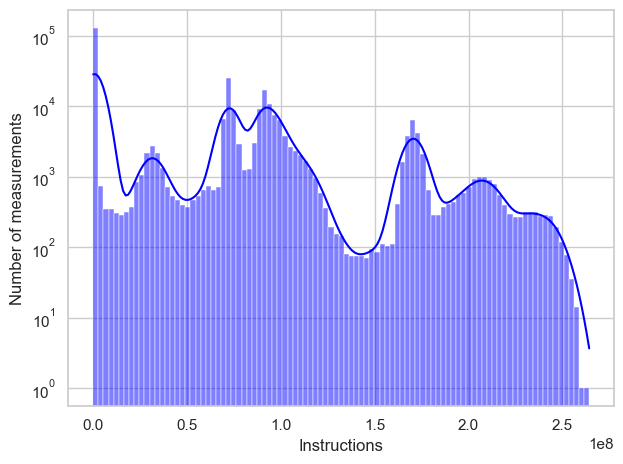

In [5]:
# Plot the distribution of instructions data
sns.histplot(
    instructions,
    kde=True,
    log_scale=False,
    color='blue'  # specify the number of colors you need
)

plt.xlabel("Instructions")
plt.ylabel("Number of measurements")
plt.yscale("log")
plt.tight_layout()

# Print statistics for instructions
instructions_mean = np.mean(instructions)
instructions_median = np.median(instructions)
instructions_std = np.std(instructions)
instructions_q1 = np.quantile(instructions, 0.25)
instructions_q2 = np.quantile(instructions, 0.5)
instructions_q3 = np.quantile(instructions, 0.75)
instructions_q4 = np.quantile(instructions, 1)

print(f"Mean Instructions: {instructions_mean}")
print(f"Median Instructions: {instructions_median}")
print(f"Standard Deviation of Instructions: {instructions_std}")
print(f"1st Quartile of Instructions: {instructions_q1}")
print(f"2nd Quartile of Instructions: {instructions_q2}")
print(f"3rd Quartile of Instructions: {instructions_q3}")
print(f"4th Quartile of Instructions: {instructions_q4}")

plt.show()


In [24]:
print (min(instructions[1:]))
print (max(instructions))

63882
264238134


<a id="cache_misses"></a>
## Cache misses data

In [ ]:
# Plot the distribution of cache misses data
sns.histplot(
    cache_misses,
    kde=True,
    log_scale=False,
    color='blue'  # specify the number of colors you need
)

plt.xlabel("Cache Misses")
plt.ylabel("Number of measurements")
plt.yscale("log")
plt.tight_layout()

# Print statistics for cache misses
cache_misses_mean = np.mean(cache_misses)
cache_misses_median = np.median(cache_misses)
cache_misses_std = np.std(cache_misses)
cache_misses_q1 = np.quantile(cache_misses, 0.25)
cache_misses_q2 = np.quantile(cache_misses, 0.5)
cache_misses_q3 = np.quantile(cache_misses, 0.75)
cache_misses_q4 = np.quantile(cache_misses, 1)

print(f"Mean Cache Misses: {cache_misses_mean}")
print(f"Median Cache Misses: {cache_misses_median}")
print(f"Standard Deviation of Cache Misses: {cache_misses_std}")
print(f"1st Quartile of Cache Misses: {cache_misses_q1}")
print(f"2nd Quartile of Cache Misses: {cache_misses_q2}")
print(f"3rd Quartile of Cache Misses: {cache_misses_q3}")
print(f"4th Quartile of Cache Misses: {cache_misses_q4}")

plt.show()


<a id="mixed_data"></a>
## Mixed data relations

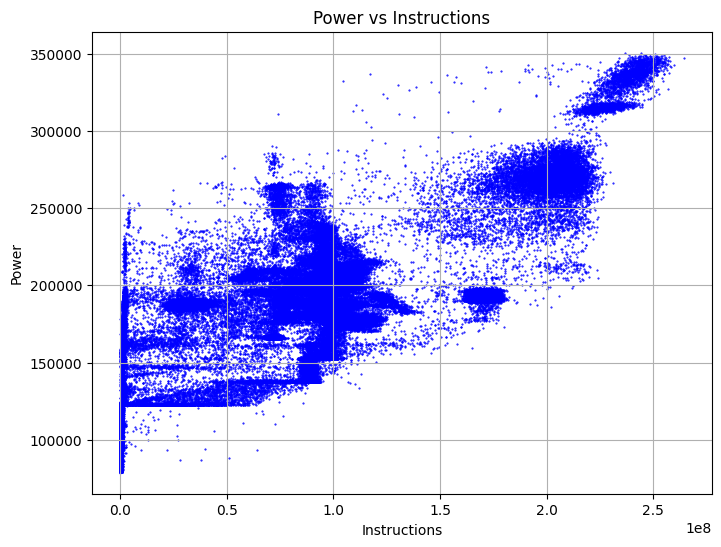

In [18]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
power = power_data['y'].values
instructions = instructions_data['y'].values[:-2]  # Exclude the last two values

# Downsample the data by plotting every nth data point
n = len(power)
power_downsampled = power[1:n]
instructions_downsampled = instructions[1:n]

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.scatter(instructions_downsampled, power_downsampled, marker='.', color='b', s=1)

# Adding labels and title
plt.xlabel('Instructions')
plt.ylabel('Power')
plt.title('Power vs Instructions')

# Display the plot
plt.grid(True)
plt.show()

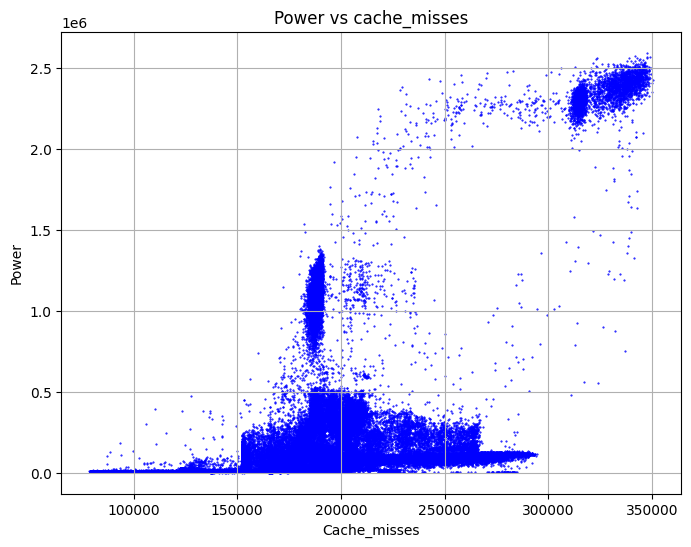

In [33]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
power = power_data['y'].values
cache_misses = cache_misses_data['y'].values[:-2]  # Assuming cache_misses_data is your DataFrame or array

# Downsample the data by plotting every nth data point
n = len(power)
power_downsampled = power[1:n]
cache_misses_downsampled = cache_misses[1:n]

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.scatter(power_downsampled, cache_misses_downsampled, marker='.', color='b', s=1)

# Adding labels and title
plt.xlabel('Cache_misses')
plt.ylabel('Power')
plt.title('Power vs cache_misses')

# Display the plot
plt.grid(True)
plt.show()


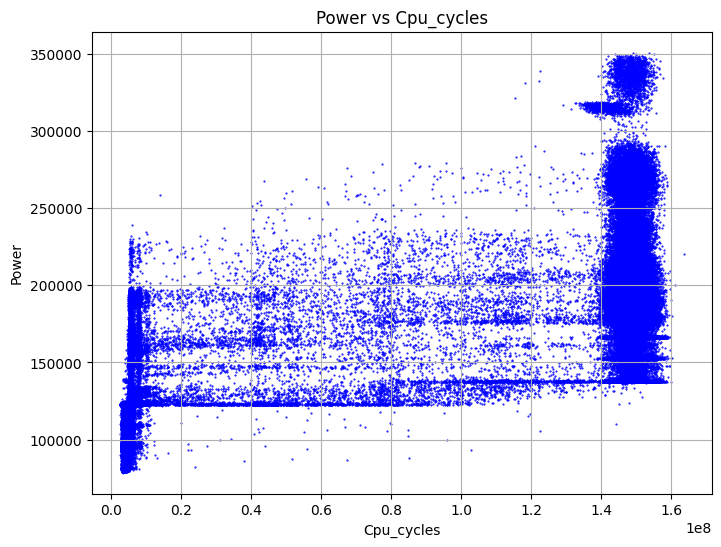

In [20]:
import matplotlib.pyplot as plt



# Downsample the data by plotting every nth data point
n = len(power)
power_downsampled = power[1:n]
cpu_cycles_downsampled = cpu_cycles[1:n]

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.scatter(cpu_cycles_downsampled, power_downsampled, marker='.', color='b', s=1)

# Adding labels and title
plt.xlabel('Cpu_cycles')
plt.ylabel('Power')
plt.title('Power vs Cpu_cycles')

# Display the plot
plt.grid(True)
plt.show()

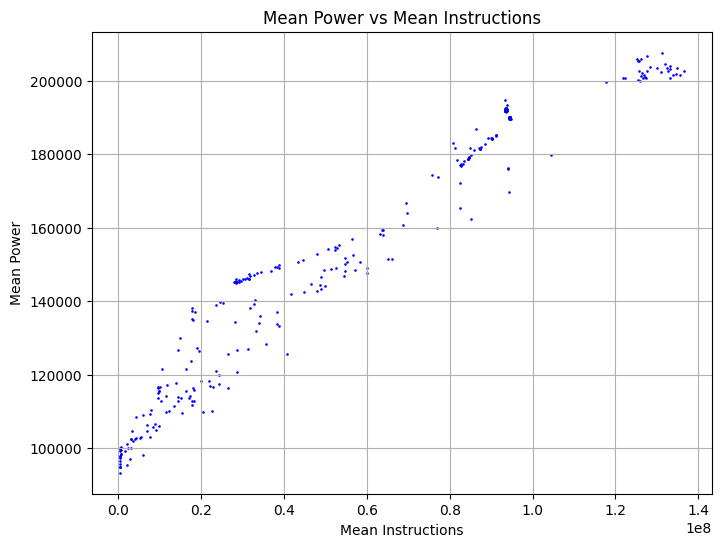

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
power = power_data['y'].values
instructions = instructions_data['y'].values[:-2]  # Exclude the last two values

# Calculate the mean of every 1000 numbers
mean_power = [np.mean(power[i:i+1000]) for i in range(0, len(power), 1000)]
mean_instructions = [np.mean(instructions[i:i+1000]) for i in range(0, len(instructions), 1000)]

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.scatter(mean_instructions, mean_power, marker='.', color='b', s=3 )

# Adding labels and title
plt.xlabel('Mean Instructions')
plt.ylabel('Mean Power')
plt.title('Mean Power vs Mean Instructions')

# Display the plot
plt.grid(True)
plt.show()


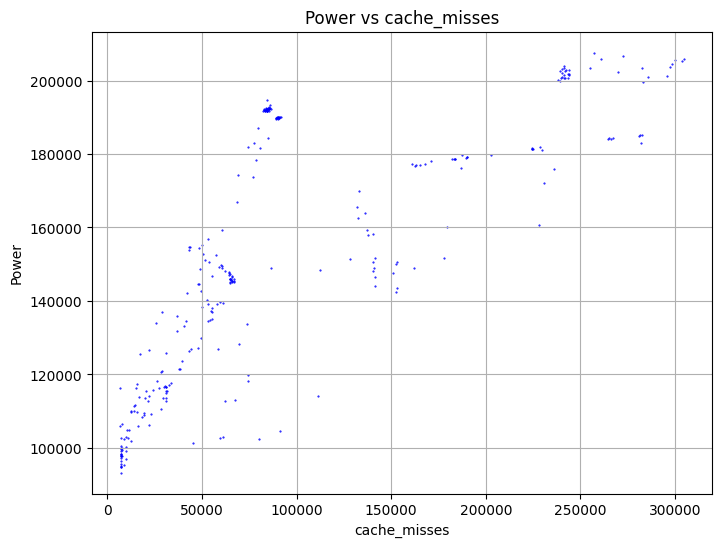

In [23]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
power = power_data['y'].values

# Downsample the data by plotting every nth data point
mean_power = [np.mean(power[i:i+1000]) for i in range(0, len(power), 1000)]
mean_cache= [np.mean(cache_misses[i:i+1000]) for i in range(0, len(cache_misses), 1000)]

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.scatter(mean_cache, mean_power, marker='.', color='b', s = 1)

# Adding labels and title
plt.xlabel('cache_misses')
plt.ylabel('Power')
plt.title('Power vs cache_misses')

# Display the plot
plt.grid(True)
plt.show()

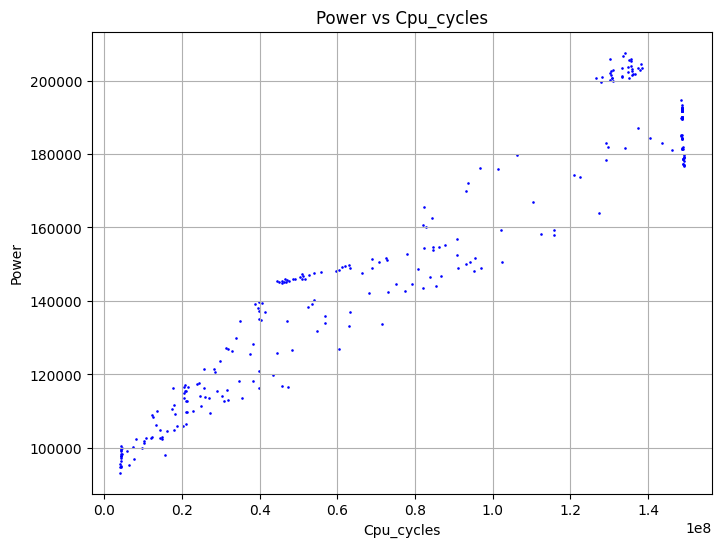

In [28]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
power = power_data['y'].values

# Downsample the data by plotting every nth data point
mean_power = [np.mean(power[i:i+1000]) for i in range(0, len(power), 1000)]
mean_cpu_cycles= [np.mean(cpu_cycles[i:i+1000]) for i in range(0, len(cpu_cycles), 1000)]

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.scatter(mean_cpu_cycles, mean_power, marker='.', color='b', s=3)

# Adding labels and title
plt.xlabel('Cpu_cycles')
plt.ylabel('Power')
plt.title('Power vs Cpu_cycles')

# Display the plot
plt.grid(True)
plt.show()

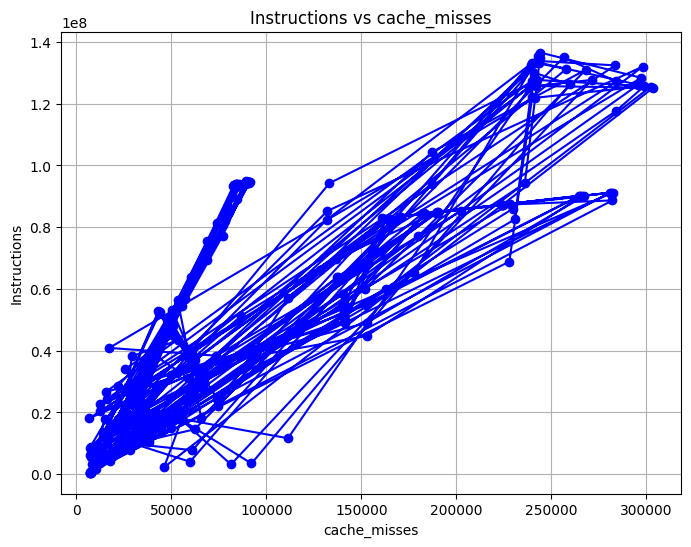

In [8]:
import matplotlib.pyplot as plt


# Downsample the data by plotting every nth data point
instructions_downsampled = [np.mean(instructions[i:i+1000]) for i in range(0, len(instructions), 1000)]
cache_misses_downsampled = [np.mean(cache_misses[i:i+1000]) for i in range(0, len(cache_misses), 1000)]

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(cache_misses_downsampled, instructions_downsampled, marker='o', color='b', linestyle='-')

# Adding labels and title
plt.xlabel('cache_misses')
plt.ylabel('Instructions')
plt.title('Instructions vs cache_misses')

# Display the plot
plt.grid(True)
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
power = power_data['y'].values
instructions = instructions_data['y'].values[:-2]  # Exclude the last two values

# Ensure both arrays have the same length
min_length = min(len(power), len(instructions))
power = power[1:min_length]
instructions = instructions[1:min_length]

# Divide every value of power by the corresponding value of instructions
inspow = np.divide(instructions,power)

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(result, bins=1000, color='blue', alpha=0.7)

# Adding labels and title
plt.xlabel('Instructions / Power ')
plt.ylabel('Frequency')
plt.title('Histogram of Power divided by Instructions')

# Display the plot
plt.grid(True)
plt.show()

NameError: name 'result' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Ensure both arrays have the same length
min_length = min(len(power), len(instructions))
power = power[1:min_length]
cpu_cycles = cpu_cycles[1:min_length]

# Divide every value of power by the corresponding value of instructions
result = np.divide( cpu_cycles,power)

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(result, bins=20, color='blue', alpha=0.7)

# Adding labels and title
plt.xlabel('Power / Cpu_cycles')
plt.ylabel('Frequency')
plt.title('Histogram of Power divided by Cpu_cycles')

# Display the plot
plt.grid(True)
plt.show()

In [ ]:
min_length = min(len(power), len(cpu_cycles))
power = power[:min_length]
cpu_cycles = cpu_cycles[:min_length]

# Divide every value of cpu_cycles by the corresponding value of power
result = np.divide(cpu_cycles, power)

# Plotting the histogram
plt.figure(figsize=(8, 6))
hist_values, bin_edges, _ = plt.hist(result, bins=100, color='blue', alpha=0.7)

# Finding the bin with the highest frequency
max_frequency_index = np.argmax(hist_values)
most_frequent_interval = (bin_edges[max_frequency_index], bin_edges[max_frequency_index + 1])

# Adding labels and title
plt.xlabel('Power / Cpu_cycles')
plt.ylabel('Frequency')
plt.title('Histogram of Power divided by Cpu_cycles')

# Display the plot
plt.grid(True)
plt.show()

print("The interval with the most frequency is:", most_frequent_interval)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
power = power_data['y'].values
cache_misses = cache_misses_data['y'].values[:-2]  # Exclude the last two values

# Ensure both arrays have the same length
min_length = min(len(power), len(cache_misses))
power = power[1:min_length]
cache_misses = cache_misses[1:min_length]

# Divide every value of power by the corresponding value of cache misses
result = np.divide(power,cache_misses)

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(result, bins=20, color='green', alpha=0.7)
hist_values, bin_edges, _ = plt.hist(result, bins=20, color='blue', alpha=0.7)

max_frequency_index = np.argmax(hist_values)
most_frequent_interval = (bin_edges[max_frequency_index], bin_edges[max_frequency_index + 1])
print("The interval with the most frequency is:", most_frequent_interval)

# Adding labels and title
plt.xlabel('Power / Cache Misses')
plt.ylabel('Frequency')
plt.title('Histogram of Power divided by Cache Misses')

# Display the plot
plt.grid(True)
plt.show()



In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
instructions = instructions_data['y'].values
cache_misses = cache_misses_data['y'].values[:-2]  # Exclude the last two values

# Ensure both arrays have the same length
min_length = min(len(instructions), len(cache_misses))
instructions = instructions[1:min_length]
cache_misses = cache_misses[1:min_length]

# Divide every value of instructions by the corresponding value of cache misses
hist_values, bin_edges, _ = plt.hist(result, bins=20, color='blue', alpha=0.7)

max_frequency_index = np.argmax(hist_values)
most_frequent_interval = (bin_edges[max_frequency_index], bin_edges[max_frequency_index + 1])
print("The interval with the most frequency is:", most_frequent_interval)

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(result, bins=20, color='orange', alpha=0.7)

# Adding labels and title
plt.xlabel('Instructions / Cache Misses')
plt.ylabel('Frequency')
plt.title('Histogram of Instructions divided by Cache Misses')

# Display the plot
plt.grid(True)
plt.show()


NameError: name 'result' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
instructions = instructions_data['y'].values
cache_misses = cache_misses_data['y'].values[:-2]  # Exclude the last two values
power = power_data['y'].values

# Ensure arrays have the same length
min_length = min(len(instructions), len(cache_misses), len(power))
instructions = instructions[1:min_length]
cache_misses = cache_misses[1:min_length]
power = power[1:min_length]

# Analyze the relationship
relations = []
powers = []

for i in range(min_length - 1):
    # Calculate the relationship between instructions and cache misses
    relation = instructions[i] / cache_misses[i]
    # Store the relation and corresponding power
    relations.append(relation)
    powers.append(power[i])

# Visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(powers, relations, color='blue', alpha=0.7)
plt.xlabel('Instructions / Cache Misses')
plt.ylabel('Power')
plt.title('Power vs Instructions / Cache Misses')
plt.grid(True)
plt.show()

<a id="generated_data"></a>
## Generated Data

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

counts, bin_edges = np.histogram(instructions, bins='auto')

percentages = [(count / len(instructions)) * 100 for count in counts]

def generate_instructions(num_values):
    num_intervals = len(bin_edges) - 1

    # Calculate the counts based on the percentages
    total_counts = num_values
    counts = [int(p * total_counts / 100) for p in percentages]

    # Generate random values based on intervals and counts
    instructions = []
    
    for count, (start, end) in zip(counts, zip(bin_edges[:-1], bin_edges[1:])):
        instructions.extend(np.random.randint(start, end, count))

    # Shuffle the generated values to make them random
    np.random.shuffle(instructions)

    return instructions[:num_values]  # Trim to the requested number of values

# Example usage:
generated_values = generate_instructions(1000000)

sns.histplot(
    generated_values,
    kde=True,
    log_scale=False,
    color='blue'  # specify the number of colors you need
)

plt.xlabel("Instructions")
plt.ylabel("Number of measurements")
plt.yscale("log")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'cache_misses' variable defined already

counts, bin_edges = np.histogram(cache_misses, bins='auto')

percentages = [(count / len(cache_misses)) * 100 for count in counts]

def generate_cache_misses(num_values):
    num_intervals = len(bin_edges) - 1

    # Calculate the counts based on the percentages
    total_counts = num_values
    counts = [int(p * total_counts / 100) for p in percentages]

    # Generate random values based on intervals and counts
    cache_misses = []
    
    for count, (start, end) in zip(counts, zip(bin_edges[:-1], bin_edges[1:])):
        cache_misses.extend(np.random.randint(start, end, count))

    # Shuffle the generated values to make them random
    np.random.shuffle(cache_misses)

    return cache_misses[:num_values]  # Trim to the requested number of values

# Example usage:
generated_values = generate_cache_misses(1000000)

sns.histplot(
    generated_values,
    kde=True,
    log_scale=False,
    color='blue'  # specify the number of colors you need
)

plt.xlabel("Cache Misses")
plt.ylabel("Number of measurements")
plt.yscale("log")
plt.tight_layout()
plt.show()


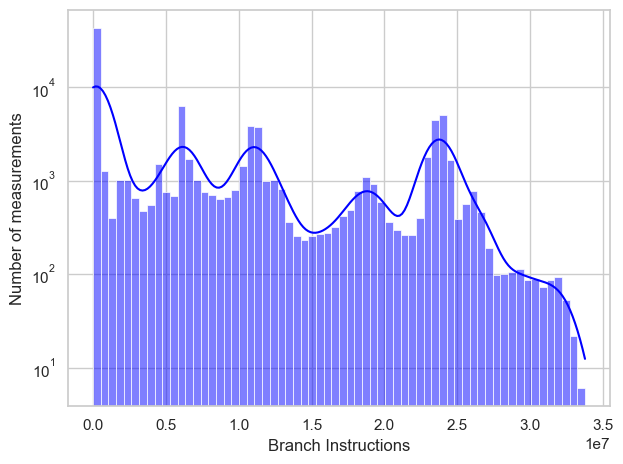

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



counts, bin_edges = np.histogram(branch_instructions, bins='auto')

percentages = [(count / len(branch_instructions)) * 100 for count in counts]

def generate_branch_instructions(num_values):
    num_intervals = len(bin_edges) - 1

    # Calculate the counts based on the percentages
    total_counts = num_values
    counts = [int(p * total_counts / 100) for p in percentages]

    # Generate random values based on intervals and counts
    branch_instructions = []
    
    for count, (start, end) in zip(counts, zip(bin_edges[:-1], bin_edges[1:])):
        branch_instructions.extend(np.random.randint(start, end, count))

    # Shuffle the generated values to make them random
    np.random.shuffle(branch_instructions)

    return branch_instructions[:num_values]  # Trim to the requested number of values


generated_values = generate_branch_instructions(100000)

sns.histplot(
    generated_values,
    kde=True,
    log_scale=False,
    color='blue'  
)

plt.xlabel("Branch Instructions")
plt.ylabel("Number of measurements")
plt.yscale("log")
plt.tight_layout()
plt.show()


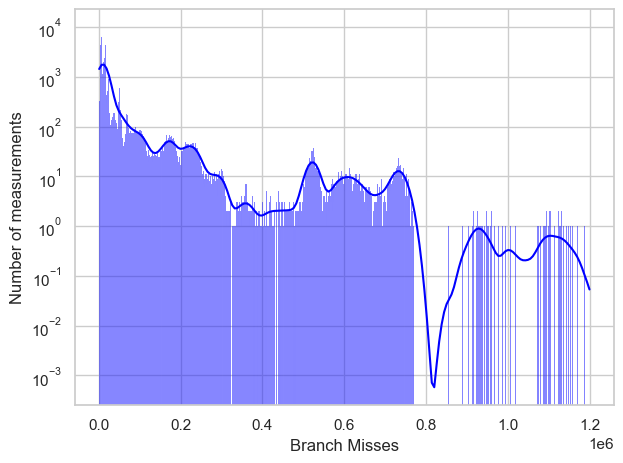

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



counts, bin_edges = np.histogram(branch_misses, bins='auto')

percentages = [(count / len(branch_misses)) * 100 for count in counts]

def generate_branch_misses(num_values):
    num_intervals = len(bin_edges) - 1

    # Calculate the counts based on the percentages
    total_counts = num_values
    counts = [int(p * total_counts / 100) for p in percentages]

    # Generate random values based on intervals and counts
    branch_misses = []
    
    for count, (start, end) in zip(counts, zip(bin_edges[:-1], bin_edges[1:])):
        branch_misses.extend(np.random.randint(start, end, count))

    # Shuffle the generated values to make them random
    np.random.shuffle(branch_misses)

    return branch_misses[:num_values]  # Trim to the requested number of values

generated_values = generate_branch_misses(100000)

sns.histplot(
    generated_values,
    kde=True,
    log_scale=False,
    color='blue' 
)

plt.xlabel("Branch Misses")
plt.ylabel("Number of measurements")
plt.yscale("log")
plt.tight_layout()
plt.show()


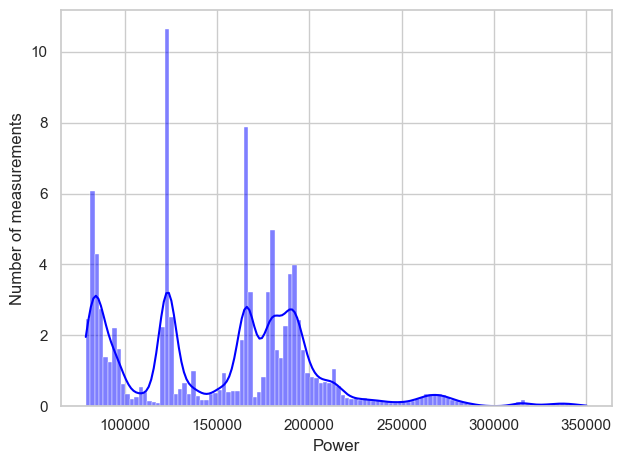

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'power' variable defined already

counts, bin_edges = np.histogram(power, bins='auto')

percentages = [(count / len(power)) * 100 for count in counts]

def generate_power(num_values):
    num_intervals = len(bin_edges) - 1

    # Calculate the counts based on the percentages
    total_counts = num_values
    counts = [int(p * total_counts / 100) for p in percentages]

    # Generate random values based on intervals and counts
    power = []
    
    for count, (start, end) in zip(counts, zip(bin_edges[:-1], bin_edges[1:])):
        power.extend(np.random.randint(start, end, count))

    # Shuffle the generated values to make them random
    np.random.shuffle(power)

    return power[:num_values]  # Trim to the requested number of values

# Example usage:
generated_values = generate_power(180310)

sns.histplot(
    generated_values,
    kde=True,
    stat="percent",
    log_scale=False,
    color='blue'  # specify the number of colors you need
)

plt.xlabel("Power")
plt.ylabel("Number of measurements")
plt.tight_layout()
plt.show()


<a id="pm-100"></a>
# PM100


### Extrai a data do dataset M100 ExaData

**PM100 dataset:** [hyperlinks](https://zenodo.org/records/8129258)

**M100 dataset:** [hyperlinks](https://gitlab.com/ecs-lab/exadata)

##### Em uso: Execution time, Power consumption.
##### Em duvida: Cores allocated/cores required, Gpu allocated/Gpu required, 


In [ ]:
####PM100

import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 

def load_data(path: str) -> pd.DataFrame:
    """Load data from a Parquet file.

    Args:
        path (str): The file path to the Parquet file.

    Returns:
        pd.DataFrame: The loaded DataFrame.
    """
    return pd.read_parquet(path)

if __name__ == "__main__":
    sns.set_theme(style="whitegrid")

    DATA_PATH = "C://Users/Nuno/job_table.parquet"
    
    # Load the dataframe
    df = load_data(DATA_PATH)
    
    # Print the DataFrame
    print(df)
    
    # Print a list with only the name of each metric
    print("List of Metrics:")
    for column in df.columns:
        print(column)


 

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_parquet("C://Users/Nuno/job_table.parquet")

# Iterate over each column and export it to a separate .csv file
for column in df.columns:
    # Construct the file name for the .csv file
    file_name = f"{column}.csv"
    
    # Extract the section from the dataset
    section = df[column]
    
    # Export the section to a .csv file
    section.to_csv(file_name, index=False)  # Set index=False to avoid writing row indices


In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 

def load_data(path:str) -> pd.DataFrame:
    """Load data from a Parquet file.

    Args:
        path (str): Path to the Parquet file.

    Returns:
        pd.DataFrame: DataFrame containing the data.
    """
    return pd.read_parquet(path)

if __name__ == "__main__":
    
    sns.set_theme(style="whitegrid")

    DATA_PATH = "C://Users/Nuno/job_table.parquet"
    
    # Load the dataframe
    df = load_data(DATA_PATH)
    
    # Plot several jobs power consumption
    sample = df[df.job_id.isin([3848449, 5165227, 2448430, 2652511, 8296, 5029954, 838942])].sort_values("num_nodes_alloc")

    for i in range(len(sample)):
        
        y = sample.iloc[i].power_consumption
        
        xrange = [j * 20 for j in range(len(y))]
        
        if i < 3:
            style = "--"
        else:
            style = "-"
        plt.plot(xrange, y, style)

    plt.xlabel("Seconds")
    plt.legend([f"Job {i+1}" for i in range(len(sample))])
    plt.ylabel("Power consumption (W)")
    plt.tight_layout()
    plt.show()
    
    df["use_gpu"] = df.num_gpus_alloc.apply(lambda g: g > 0)
        
    power_df = {"power":[], "use_gpu":[], "nodes_allocated":[]}

    for pc in df[["power_consumption", "use_gpu", "num_nodes_alloc"]].values:
                
        power_df["power"] += list(pc[0])
        power_df["use_gpu"] += [pc[1]]*len(pc[0])
        power_df["nodes_allocated"] += [pc[-1]]*len(pc[0])
    
    power_df = pd.DataFrame.from_dict(power_df)

    sns.boxplot(power_df[power_df["nodes_allocated"] == 1], x = "use_gpu", y = "power")
    plt.xlabel("Jobs using")
    plt.xticks([0, 1], ["Cores", "Cores + GPUs"])
    plt.ylabel("Power consumption per job (W)")
    ##plt.savefig("plots/power_consumption_cpu_gpu_box.png")
    ##plt.clf()
    

    


    
   
    
   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Your existing code goes here...

if __name__ == "__main__":
    
    sns.set_theme(style="whitegrid")

    DATA_PATH = "C://Users/Nuno/job_table.parquet"
    
    # Load the dataframe
    df = load_data(DATA_PATH)
    
    # Plot several jobs power consumption
    sample = df[df.job_id.isin([3848449, 5165227, 2448430, 2652511, 8296, 5029954, 838942])].sort_values("num_nodes_alloc")

    for i in range(len(sample)):
        
        y = sample.iloc[i].power_consumption
        
        xrange = [j * 20 for j in range(len(y))]
        
        if i < 3:
            style = "--"
        else:
            style = "-"
        plt.plot(xrange, y, style)

    plt.xlabel("Seconds")
    plt.legend([f"Job {i+1}" for i in range(len(sample))])
    plt.ylabel("Power consumption (W)")
    plt.tight_layout()
    plt.show()
    
    df["use_gpu"] = df.num_gpus_alloc.apply(lambda g: g > 0)
        
    power_df = {"power":[], "use_gpu":[], "nodes_allocated":[]}

    for pc in df[["power_consumption", "use_gpu", "num_nodes_alloc"]].values:
                
        power_df["power"] += list(pc[0])
        power_df["use_gpu"] += [pc[1]]*len(pc[0])
        power_df["nodes_allocated"] += [pc[-1]]*len(pc[0])
    
    power_df = pd.DataFrame.from_dict(power_df)

    sns.boxplot(power_df[power_df["nodes_allocated"] == 1], x = "use_gpu", y = "power")
    plt.xlabel("Jobs using")
    plt.xticks([0, 1], ["Cores", "Cores + GPUs"])
    plt.ylabel("Power consumption per job (W)")
    ##plt.savefig("plots/power_consumption_cpu_gpu_box.png")
    plt.clf()
    
    


In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 

def load_data(path:str) -> pd.DataFrame:
    """_summary_

    Args:
        path (str): _description_

    Returns:
        pd.DataFrame: _description_
    """
    return pd.read_parquet(path)

if __name__ == "__main__":
    
    sns.set_theme(style="whitegrid")
    
    # Path to the PM100 data
    DATA_PATH = "C://Users/Nuno/job_table.parquet"
    
    # Load the dataframe
    df = load_data(DATA_PATH)
    
    # Exit state pie plot
    # Exit state pie plot
    df['job_state'].replace({"OUT_OF_MEMORY": "OOM+NODE FAIL", "NODE_FAIL": "OOM+NODE FAIL"}, inplace=True)

    ##df = df.replace("OUT_OF_MEMORY", "OOM+NODE FAIL")
    ##df = df.replace("NODE_FAIL", "OOM+NODE FAIL")
    # Count the values by state
    data = df.job_state.value_counts()
    plt.pie(data.values, labels = data.index.values, colors=sns.color_palette("colorblind"), explode=[0.03]*(len(data)), autopct='%1.0f%%', )
    ##plt.savefig("plots/state_pie.png")
    ##plt.clf()
    
    # Plot the duration of the jobs divided by exit state
    # Convert runtime to minutes
    df.run_time = df.run_time.apply(lambda rt: round(int(rt/60), -2)).values
    
    # Plot the histogram
    sns.histplot(
    df,
    x="run_time",
    hue="job_state",
    multiple="dodge",
    kde=False,
    log_scale=False,
    palette=sns.color_palette("colorblind", 5),  # specify the number of colors you need
    hue_order=["COMPLETED", "FAILED", "CANCELLED", "TIMEOUT", "OOM+NODE FAIL"]
    )
    plt.xlabel("Duration (in minutes)")
    plt.ylabel("Number of jobs")
    plt.yscale("log")
    plt.tight_layout()
    ##plt.savefig("plots/run_time_state.png")
    ##plt.clf()




   

<a id="df_completed"></a>

# DF_COMPLETED RUN

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 

def load_data(path: str) -> pd.DataFrame:
    """Load the data from a parquet file.

    Args:
        path (str): Path to the parquet file.

    Returns:
        pd.DataFrame: Loaded DataFrame.
    """
    return pd.read_parquet(path)

if __name__ == "__main__":
    
    sns.set_theme(style="whitegrid")
    
    # Path to the PM100 data
    DATA_PATH = "C://Users/Nuno/job_table.parquet"
    
    # Load the dataframe
    df = load_data(DATA_PATH)
    
    # Filter out completed jobs
    df_completed = df[df['job_state'] == 'COMPLETED'].copy()  # Use copy() to explicitly create a copy
    
    # Exit state pie plot
    df_completed['job_state'].replace({"OUT_OF_MEMORY": "OOM+NODE FAIL", "NODE_FAIL": "OOM+NODE FAIL"}, inplace=True)

    # Plot the duration of the completed jobs divided by exit state
    # Convert runtime to minutes
    ##df_completed['run_time'] = df_completed['run_time'].apply(lambda rt: round(int(rt/60), -2))

    df_completed['run_time'].to_csv('tempo.csv', index=False)

In [2]:
print (df)

                                       cores_alloc_layout  \
0       {900: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...   
1       {687: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...   
2       {687: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...   
3                         {416: [0, 1, 2, 3, 4, 5, 6, 7]}   
4                         {416: [0, 1, 2, 3, 4, 5, 6, 7]}   
...                                                   ...   
231233  {609: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...   
231234  {386: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...   
231235  {55: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...   
231236  {858: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...   
231237  {672: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...   

                                          cores_allocated  cores_per_task  \
0       {900: 128, 915: 128, 902: 128, 901: 128, 904: ...               4   
1       {687: 128, 688: 128, 681: 128, 682: 128, 680: ...               4   
2       {687: 128, 688: 128, 681: 12

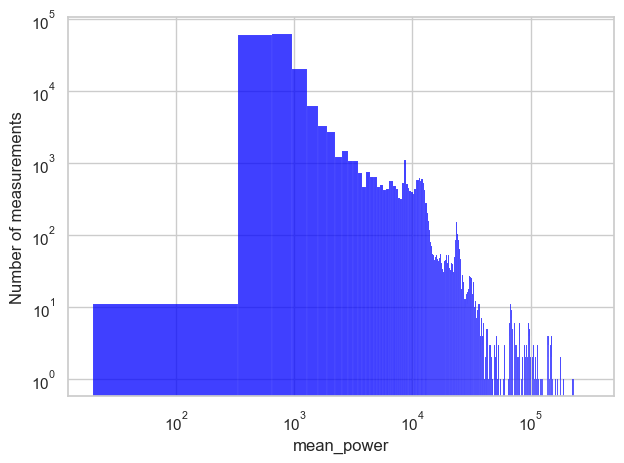

In [5]:
lis = df_completed["power_consumption"]
total_power = []

for i in range(len(lis)):
    mean = np.mean(lis.iloc[i])
    total_power.append(mean)

sns.histplot(
    total_power,
    bins = 1000,
    kde=False,
    log_scale=False,
    color='blue'  # specify the number of colors you need
)

plt.xlabel("mean_power")
plt.ylabel("Number of measurements")
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()

315000


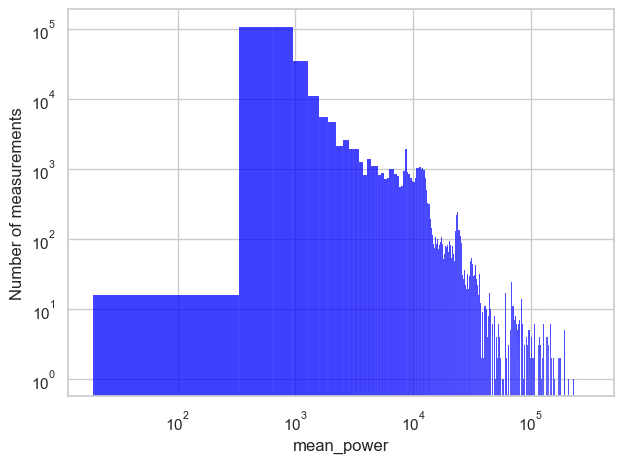

In [10]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity

# Define the KDE function
def generate_power_kde(num_values, data, bandwidth=0.5):
    # Convert the data to a NumPy array
    data = np.array(data)
    # Fit KDE model to the power consumption data
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(data[:, None])
    
    # Generate new samples
    new_samples = kde.sample(num_values)
    
    # Flatten the array and return as list
    return new_samples.flatten()

# Example usage
# Load your power consumption data (example)
power_data = total_power

# Generate new power consumption data
num_values = 315000  # Number of new samples to generate
augmented_power_data = generate_power_kde(num_values, power_data)
print (len(augmented_power_data))

sns.histplot(
    augmented_power_data,
    bins = 1000,
    kde=False,
    log_scale=False,
    color='blue'  # specify the number of colors you need
)

plt.xlabel("mean_power")
plt.ylabel("Number of measurements")
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()

<a id="time"></a>
## Time treatment

Mean Run Time: 5278.1432699240195 units
Median Run Time: 190.0 units
Standard Deviation of Run Time: 15578.662937937 units
1st Quartile of Run Time: 9.0 units
2nd Quartile of Run Time: 190.0 units
3rd Quartile of Run Time: 1754.0 units
4th Quartile of Run Time: 86395.0 units
Number of COMPLETED jobs: 180310
Max duration for COMPLETED jobs: 86395 seconds
Min duration for COMPLETED jobs: 0 seconds


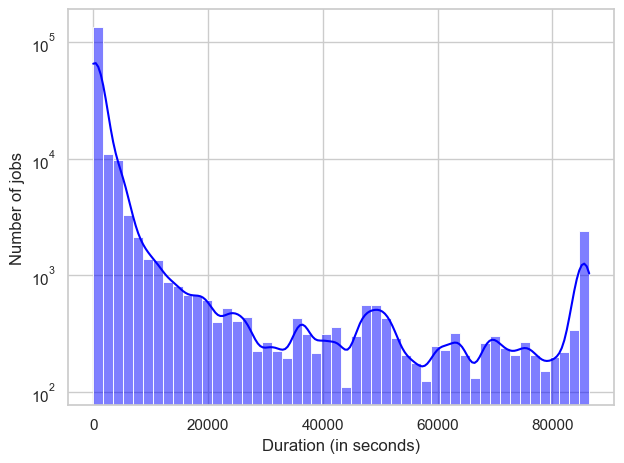

In [11]:
sns.histplot(
    df_completed,
    x="run_time",
    kde=True,
    bins = 50,
    log_scale=False,
    color='blue',  # specify the number of colors you need
)
    
plt.xlabel("Duration (in seconds)")
plt.ylabel("Number of jobs")
plt.yscale("log")
plt.tight_layout()

    # Print the number of jobs being plotted
    
for state in df_completed['job_state'].unique():
    num_jobs = len(df_completed[df_completed['job_state'] == state])
    max_duration = max(df_completed['run_time'])
    min_duration = min(df_completed['run_time'])
    
time_mean = df_completed['run_time'].mean()
time_median = df_completed['run_time'].median()
time_std = df_completed['run_time'].std()
time_q1 = df_completed['run_time'].quantile(0.25)
time_q2 = df_completed['run_time'].quantile(0.5)
time_q3 = df_completed['run_time'].quantile(0.75)
time_q4 = df_completed['run_time'].quantile(1)

print(f"Mean Run Time: {time_mean} units")
print(f"Median Run Time: {time_median} units")
print(f"Standard Deviation of Run Time: {time_std} units")
print(f"1st Quartile of Run Time: {time_q1} units")
print(f"2nd Quartile of Run Time: {time_q2} units")
print(f"3rd Quartile of Run Time: {time_q3} units")
print(f"4th Quartile of Run Time: {time_q4} units")

    
print(f"Number of {state} jobs: {num_jobs}")
print(f"Max duration for {state} jobs: {max_duration} seconds")
print(f"Min duration for {state} jobs: {min_duration} seconds")    

plt.show()

In [11]:
check_tasks = list(df_completed["run_time"])
matched_dict = {}

i = 0
while i < len(check_tasks):
    matched_list = [check_tasks[i]]  # Initialize matched_list with the current index i
    value = check_tasks[i]
    indices_to_remove = []  # Create a list to store indices to remove from check_tasks
    for j in range(i + 1, len(check_tasks)):  # Start from i+1 to avoid redundant comparisons
        if abs(check_tasks[j] - value) <= 0.05 * value:  # Check if the conditions match
            matched_list.append(check_tasks[j])
            indices_to_remove.append(j)  # Store the index to remove
    # Remove elements from check_tasks in reverse order to avoid index shifting
    for idx in sorted(indices_to_remove, reverse=True):
        del check_tasks[idx]
    
    # Add the matched list for check_tasks[i] to the dictionary
    matched_dict[value] = len(matched_list)  # Store the length of matched_list instead of the list itself
    i += 1

# Filter out keys with empty lists
matched_dict = {key: value for key, value in matched_dict.items() if value}

print(matched_dict)




{18: 991, 19: 848, 20: 1270, 4: 1316, 1836: 1647, 149: 1424, 3221: 2055, 73: 964, 16: 1036, 22: 781, 6: 1285, 15: 1309, 3744: 1776, 2362: 1704, 3: 2556, 6832: 844, 1140: 1804, 12403: 559, 17: 847, 14: 725, 2197: 936, 5034: 2685, 30: 933, 123: 1989, 430: 2852, 7: 1111, 14071: 844, 206: 1515, 473: 1569, 82: 1044, 311: 2849, 1001: 1325, 10: 987, 16701: 665, 5: 1375, 8: 1123, 52: 2035, 1378: 1892, 2075: 679, 107: 1771, 788: 1338, 246: 824, 4461: 2907, 163: 1106, 8554: 990, 85554: 2949, 1573: 1694, 638: 1916, 132: 1189, 895: 1241, 69926: 966, 68: 1354, 5613: 1128, 24937: 691, 17806: 426, 116: 511, 550: 1540, 15069: 371, 2: 10532, 24: 745, 265: 809, 99: 1286, 3030: 614, 32: 615, 346: 1433, 28: 621, 9075: 438, 56: 990, 1735: 889, 48: 1709, 6222: 944, 520: 670, 61251: 902, 396: 8470, 13: 695, 328: 157, 7341: 587, 182: 3246, 34937: 711, 688: 1220, 10087: 711, 93: 755, 193: 427, 88: 229, 9: 1004, 21898: 473, 11: 868, 27364: 524, 34: 1107, 2596: 1046, 1203: 1719, 38: 1173, 231: 553, 4038: 998, 61

In [12]:
check_tasks = list(df_completed["run_time"])

# Initialize an empty list to store matched tasks
matched_list = []

# Iterate over the elements in check_tasks
for task in check_tasks:
    # Check if the value falls within the specified interval around check_tasks[1]
    if (check_tasks[1] - 0.05 * check_tasks[1] <= task <= check_tasks[1] + 0.05 * check_tasks[1]):
        matched_list.append(task)

# Print or do something with the matched tasks list
print(len(matched_list))


848


In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

def generate_time(num_values):
    time = np.array(df_completed["run_time"])
    
    counts_time, bin_edges_time = np.histogram(time, bins='auto')

    percentages_time = [(count / len(time)) * 100 for count in counts_time]

    # Calculate the counts based on the percentages
    total_counts = num_values

    counts_time = [(p * total_counts / 100) for p in percentages_time]

    # Ensure that each bin contributes at least one value
    min_counts = [1 if count == 0 and total_counts > 0 else count for count in counts_time]

    # Adjust total_counts
    total_counts -= sum(counts_time) - sum(min_counts)

    # Recalculate percentages
    percentages_time = [(count / sum(min_counts)) * 100 for count in min_counts]

    # Generate random values based on intervals and counts
    time1 = []

    for count, (start, end) in zip(min_counts, zip(bin_edges_time[:-1], bin_edges_time[1:])):
        # Generate random values within each bin
        values = np.random.randint(start, end, math.ceil(count))
        time1.extend(values)

    # Shuffle the generated values to make them random
    np.random.shuffle(time1)

    return time1[:num_values]  # Trim to the requested number of values


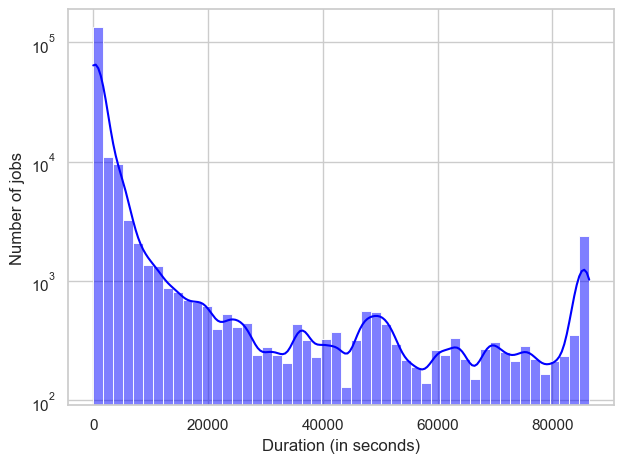

In [12]:
new_time = generate_time(180310)

sns.histplot(
    new_time,
    kde=True,
    bins = 50,
    log_scale=False,
    color='blue',  # specify the number of colors you need
)
    
plt.xlabel("Duration (in seconds)")
plt.ylabel("Number of jobs")
plt.yscale("log")
plt.tight_layout()

In [ ]:
import seaborn as sns
import numpy as np

# Assuming df_completed['run_time'] contains your data
data = df_completed['run_time']

# Plot KDE and get the KDE line
sns.histplot(data, kde=True, log_scale=False, color='blue')
kde_line = plt.gca().get_lines()[0]

# Extract x and y values from the KDE line
kde_x = kde_line.get_xdata()
kde_y = kde_line.get_ydata()

# Normalize the KDE values to sum up to 1
kde_y_normalized = kde_y / np.sum(kde_y)

# Generate random indices without replacement
synthetic_indices = np.random.choice(len(kde_x), size=len(data) * 2, p=kde_y_normalized, replace=True)

# Use the selected indices to sample from the KDE x-values
random_values = kde_x[synthetic_indices]

# Print the first 10 random values as an example
print(len(random_values))




In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_completed['run_time'] contains your original data
original_data = df_completed['run_time']

# Generate synthetic dataset (assuming you've already generated random_values)
# For demonstration purposes, let's generate synthetic data of the same size as the original data
synthetic_data = random_values

sns.histplot(
    synthetic_data,
    kde=True,
    log_scale=False,
    color='blue',  # specify the number of colors you need
)
    
plt.xlabel("Duration (in seconds)")
plt.ylabel("Number of jobs")
plt.yscale("log")
plt.tight_layout()


In [ ]:
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Assuming df_completed['run_time'] contains your data
data = df_completed['run_time']

# Plot KDE and get the KDE line
sns.histplot(data, kde=True, log_scale=False, color='blue')
kde_line = plt.gca().get_lines()[0]

# Extract x and y values from the KDE line
kde_x = kde_line.get_xdata()
kde_y = kde_line.get_ydata()

# Fit a Gaussian distribution to the KDE
mu, std = norm.fit(data)

# Generate random values following the Gaussian distribution
random_values = np.random.normal(mu, std, size=500000)

# Print the first 10 random values as an example
sns.histplot(random_values, kde=True, log_scale=False, color='red')



In [ ]:
import numpy as np
from scipy.stats import gaussian_kde

# Assuming df_completed['run_time'] contains your data
data = df_completed['run_time']

# Create KDE object
kde = gaussian_kde(data)

# Define the range of values you want to evaluate the KDE over
x_values = np.linspace(min(data), max(data), 1000)

# Calculate the KDE values at these points
kde_values = kde(x_values)

# Print the expression
print (kde_values)

<a id="cores"></a>
## Cores treatment

In [ ]:
l1 = df_completed["num_cores_alloc"]
    
import pandas as pd

l1 = sorted(df_completed["num_cores_alloc"])




In [ ]:
transformation_map = {
    4: 1, 8: 2, 12: 3, 16: 4, 20: 5, 24: 6, 28: 7, 32: 8, 36: 9, 40: 10,
    44: 11, 48: 12, 52: 13, 56: 14, 60: 15, 64: 16, 68: 17, 72: 18, 76: 19, 80: 20,
    84: 21, 88: 22, 92: 23, 96: 24, 100: 25, 104: 26, 108: 27, 112: 28, 116: 29, 120: 30,
    124: 31, 128: 32, 132: 33, 136: 34, 140: 35, 144: 36, 148: 37, 152: 38, 160: 39, 168: 40,
    176: 41, 184: 42, 192: 43, 200: 44, 208: 45, 216: 46, 224: 47, 232: 48, 240: 49, 248: 50,
    256: 51, 288: 52, 320: 53, 352: 54, 384: 55, 400: 56, 416: 57, 448: 58, 480: 59, 512: 60,
    576: 61, 640: 62, 720: 63, 768: 64, 832: 65, 896: 66, 960: 67, 1024: 68, 1152: 69, 1280: 70,
    1408: 71, 1536: 72, 1600: 73, 1664: 74, 1792: 75, 1920: 76, 2048: 77, 2176: 78, 2304: 79, 2560: 80,
    2688: 81, 3072: 82, 3200: 83, 3456: 84, 3584: 85, 3840: 86, 4096: 87, 4224: 88, 4480: 89, 4608: 90,
    5120: 91, 6016: 92, 6144: 93, 6400: 94, 6656: 95, 6912: 96, 7168: 97, 7680: 98, 8192: 99, 8320: 100,
    9216: 101, 10240: 102, 10368: 103, 12544: 104, 12800: 105, 13824: 106, 14336: 107, 16128: 108,
    16384: 109, 18432: 110, 20736: 111, 32256: 112, 32768: 113
}

In [ ]:
4, 8, 12, 16, 20, 24, 28, 32, 36, 40,
    44, 48, 52, 56, 60, 64, 68, 72, 76, 80,
    84, 88, 92, 96, 100, 104, 108, 112, 116, 120,
    124, 128, 132, 136, 140, 144, 148, 152, 160, 168: 40,
    176: 41, 184: 42, 192: 43, 200: 44, 208: 45, 216: 46, 224: 47, 232: 48, 240: 49, 248: 50,
    256: 51, 288: 52, 320: 53, 352: 54, 384: 55, 400: 56, 416: 57, 448: 58, 480: 59, 512: 60,
    576: 61, 640: 62, 720: 63, 768: 64, 832: 65, 896: 66, 960: 67, 1024: 68, 1152: 69, 1280: 70,
    1408: 71, 1536: 72, 1600: 73, 1664: 74, 1792: 75, 1920: 76, 2048: 77, 2176: 78, 2304: 79, 2560: 80,
    2688: 81, 3072: 82, 3200: 83, 3456: 84, 3584: 85, 3840: 86, 4096: 87, 4224: 88, 4480: 89, 4608: 90,
    5120: 91, 6016: 92, 6144: 93, 6400: 94, 6656: 95, 6912: 96, 7168: 97, 7680: 98, 8192: 99, 8320: 100,
    9216: 101, 10240: 102, 10368: 103, 12544: 104, 12800: 105, 13824: 106, 14336: 107, 16128: 108,
    16384: 109, 18432: 110, 20736: 111, 32256: 112, 32768: 113
}

In [ ]:
count_dict = {}

# Transform original values using the dictionary
transformed_values = [transformation_map.get(val, val) for val in l1]


for num in l1:
    count_dict[num] = count_dict.get(num, 0) + 1
    
total_values = len(l1)
recurr = [count / total_values for count in count_dict.values()]

# Initialize groups
groups = {
    "1-10": [],
    "10-100": [],
    "100-1000": [],
    "1000-10000": [],
    "over 10000": []
}

# Categorize counts into groups
for num, count in count_dict.items():
    if count >= 1 and count <= 10:
        groups["1-10"].append((num, count))
    elif count > 10 and count <= 100:
        groups["10-100"].append((num, count))
    elif count > 100 and count <= 1000:
        groups["100-1000"].append((num, count))
    elif count > 1000 and count <= 10000:
        groups["1000-10000"].append((num, count))
    else:
        groups["over 10000"].append((num, count))

# Print groups
##for group, items in groups.items():
    ##print(f"Group {group}:")
    ##for num, count in items:
        ##print(f"{num}: {count}")
x_values= count_dict.keys()

data = list(zip(x_values,recurr))

sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

print (sorted_data)

In [ ]:

mport matplotlib.pyplot as plt

# Initialize subplots
fig, axs = plt.subplots(5, 1, figsize=(8, 20))

# Categorize counts into groups and plot histograms
for i, (group, items) in enumerate(groups.items()):
    # Extract counts for the current group
    counts = [count for _, count in items]
    
    # Plot histogram
    axs[i].hist(counts, bins=20, color='blue', alpha=0.7)
    axs[i].set_title(f"Group {group}")
    axs[i].set_xlabel("Counts")
    axs[i].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
count_dict = {}

ft_imp = 0
# Transform original values using the dictionary
transformed_values = [transformation_map.get(val, val) for val in l1]

for num in transformed_values:
    count_dict[num] = count_dict.get(num, 0) + 1

# Print the counts sorted by keys
##for num, count in sorted(count_dict.items()):
    ##print(f"{num}: {count}")
    
##for num, count in sorted(count_dict.items()):
    ##ft_imp = count count_dict[num]
    


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the first 10 elements from transformed_values
transformed_values_1 = transformed_values[:100]
print(transformed_values_1)
# Create the histogram plot
histogram = sns.histplot(
    transformed_values_1,
    kde=False,  # Turn off kernel density estimation
    color='blue',
)

# Label the plot
plt.xlabel("Number of cores allocated to the job")
plt.ylabel("Number of jobs")

# Show the plot
plt.show()



In [ ]:
transformed_series = pd.Series(transformed_values)


cores_mean = transformed_series.mean()
cores_median = transformed_series.median()
cores_std = transformed_series.std()
cores_q1 = transformed_series.quantile(0.25)
cores_q2 = transformed_series.quantile(0.5)
cores_q3 = transformed_series.quantile(0.75)
cores_q4 = transformed_series.quantile(1)

print(f"Mean Number of Cores Allocated: {cores_mean}")
print(f"Median Number of Cores Allocated: {cores_median}")
print(f"Standard Deviation of Cores Allocated: {cores_std}")
print(f"1st Quartile of Cores Allocated: {cores_q1}")
print(f"2nd Quartile of Cores Allocated: {cores_q2}")
print(f"3rd Quartile of Cores Allocated: {cores_q3}")
print(f"4th Quartile of Cores Allocated: {cores_q4}")


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

random_values= transformed_values


candidate_distributions = [
    stats.norm,        # Normal distribution
    stats.lognorm,     # Log-normal distribution
    stats.gamma,       # Gamma distribution
    stats.expon,       # Exponential distribution
    stats.beta,        # Beta distribution
    stats.uniform,     # Uniform distribution
    stats.chi2,        # Chi-squared distribution
    stats.t,           # Student's t-distribution
    stats.f,           # F-distribution
    stats.weibull_min, # Weibull minimum distribution
    stats.logistic,    # Logistic distribution
    stats.triang,      # Triangular distribution
    stats.gumbel_r,    # Right-skewed Gumbel distribution
    stats.gumbel_l,    # Left-skewed Gumbel distribution
    stats.pearson3,    # Pearson type III distribution
    stats.powerlaw,    # Power-law distribution
]


# Initialize variables to store best fit distribution and corresponding parameters
best_fit_distribution = None
best_fit_params = None
best_aic = np.inf

# Iterate over candidate distributions
for distribution in candidate_distributions:
    # Fit the distribution to the data
    params = distribution.fit(random_values)
    
    # Calculate the log-likelihood
    log_likelihood = distribution.logpdf(random_values, *params).sum()
    
    # Calculate AIC (Akaike Information Criterion)
    k = len(params)  # number of parameters in the distribution
    n = len(random_values)  # number of data points
    aic = -2 * log_likelihood + 2 * k
    
    # Compare with the current best fit
    if aic < best_aic:
        best_fit_distribution = distribution
        best_fit_params = params
        best_aic = aic

# Plot empirical CDF of actual data
sns.ecdfplot(random_values, label='Empirical CDF', linewidth=2)

# Plot fitted CDF of the best-fit distribution
x = np.linspace(np.min(random_values), np.max(random_values), 100000)
cdf_values = best_fit_distribution.cdf(x, *best_fit_params)
plt.plot(x, cdf_values, label=best_fit_distribution.name)

plt.xlabel("Number of cores allocated to the job")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.title(f"Best Fitting Distribution: {best_fit_distribution.name}")
plt.show()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mean = 30.065232100271754
std_dev = 21.253635790459967
size = len(transformed_series)
alpha = 3  # Shape parameter for the power law distribution

uniform_values = np.random.uniform(size=size)

# Apply Box-Muller transform to make the distribution follow a power law distribution
random_values_1 = std_dev * np.power((1 - uniform_values), -1/(alpha - 1))
random_values_1 = (np.random.power(alpha, size) * std_dev) 
random_values_adj = random_values_1 - min(random_values_1)

# Adjust the generated values to cover the range of cores allocated in the original data
min_cores = transformed_series.min()
max_cores = transformed_series.max()



# Plot histogram of generated random values
sns.histplot(
    random_values_adj,
    kde=False,
    log_scale=False,
    color='red',  # You can specify the color you prefer
    label='Generated Distribution'
)

# Plot histogram of actual data
sns.histplot(
    transformed_series,
    kde=False,
    log_scale=False,
    color='blue',
    label='Actual Data'
)


plt.xlabel("Number of cores allocated to the job")
plt.ylabel("Number of jobs")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.tight_layout()

# Show or save the plot
plt.show()


In [ ]:

# Plot the distribution of the number of cores allocated to the jobs
sns.histplot(
    df_completed,
    x="num_cores_alloc",
    kde=False,
    log_scale=False,
    color='blue',  # specify the number of colors you need
)
plt.xlabel("Number of cores allocated to the job")
plt.ylabel("Number of jobs")
plt.yscale("log")
plt.xscale("log")
plt.tight_layout()
    ##plt.savefig("plots/cores_alloc.png")
    ##plt.clf()

cores_mean = df_completed['num_cores_alloc'].mean()
cores_median = df_completed['num_cores_alloc'].median()
cores_std = df_completed['num_cores_alloc'].std()
cores_q1 = df_completed['num_cores_alloc'].quantile(0.25)
cores_q2 = df_completed['num_cores_alloc'].quantile(0.5)
cores_q3 = df_completed['num_cores_alloc'].quantile(0.75)
cores_q4 = df_completed['num_cores_alloc'].quantile(1)

print(f"Mean Number of Cores Allocated: {cores_mean}")
print(f"Median Number of Cores Allocated: {cores_median}")
print(f"Standard Deviation of Cores Allocated: {cores_std}")
print(f"1st Quartile of Cores Allocated: {cores_q1}")
print(f"2nd Quartile of Cores Allocated: {cores_q2}")
print(f"3rd Quartile of Cores Allocated: {cores_q3}")
print(f"4th Quartile of Cores Allocated: {cores_q4}")


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters for the t-distribution
dfn = 10
dfd = 10
mean = 348.2872386445566
std_dev = 1355.5489645318482

# Generate random values following a t-distribution
random_values_1 = mean + std_dev * np.random.f(dfn, dfd, len(df_completed["num_cores_alloc"]))

# Adjust the generated values to cover the range of cores allocated in the original data
min_cores = df_completed['num_cores_alloc'].min()
max_cores = df_completed['num_cores_alloc'].max()
random_values_1_adjusted = random_values_1 - min(random_values_1) + min(df_completed['num_cores_alloc'])



# Plot histogram of generated random values
sns.histplot(
    random_values_1_adjusted,
    kde=False,
    log_scale=False,
    color='red',  # You can specify the color you prefer
    label='Generated Distribution'
)

# Plot histogram of actual data
sns.histplot(
    df_completed['num_cores_alloc'],
    kde=False,
    log_scale=False,
    color='blue',
    label='Actual Data'
)

sns.histplot(
    random_values_1,
    kde=False,
    log_scale=False,
    color='green',
    label='Not adjusted'
)

plt.xlabel("Number of cores allocated to the job")
plt.ylabel("Number of jobs")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.tight_layout()

# Show or save the plot
plt.show()


In [ ]:
random_values_2 = []
for value in random_values_1:
    additional_values = mean + std_dev * np.random.uniform(size=9)
    random_values_2.extend(additional_values)

# Plot histogram of generated random values
sns.histplot(
    df_completed,
    x = "num_cores_alloc",
    kde=False,
    log_scale=False,
    color='red',  # You can specify the color you prefer
    label='Generated Distribution'
)

# Plot histogram of actual data
sns.histplot(
    random_values_2,
    kde=False,
    log_scale=False,
    color='blue',
    label='Actual Data'
)

plt.xlabel("Number of cores allocated to the job")
plt.ylabel("Number of jobs")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.tight_layout()
##plt.savefig("plots/cores_alloc.png")
##plt.clf()


In [ ]:
print (len(df_completed["num_cores_alloc"]))
print (len(random_values_2))
print (len(random_values_1))
print (len(random_values))

In [ ]:
lis = df_completed["num_cores_alloc"]
i = 1
total = 0
random_values= []
for n in range (len(lis)):
    total += lis.iloc[n]
    if i > 10:
        random_values.append(total/10)
        total = 0
        i = 1
    else:
        i = i + 1
        




In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


random_values = df_completed["num_cores_alloc"]



candidate_distributions = [
    stats.norm,    # Normal distribution
    stats.lognorm,  # Log-normal distribution
    stats.gamma,   # Gamma distribution
    stats.expon,   # Exponential distribution
    stats.beta,    # Beta distribution
    stats.uniform, # Uniform distribution
    stats.chi2,    # Chi-squared distribution
    stats.t,       # Student's t-distribution
    stats.f,       # F-distribution
    stats.weibull_min, # Weibull minimum distribution
    stats.logistic,   # Logistic distribution
    stats.triang,     # Triangular distribution
    stats.gumbel_r,   # Right-skewed Gumbel distribution
    stats.gumbel_l,   # Left-skewed Gumbel distribution
    stats.pearson3,   # Pearson type III distribution
    stats.powerlaw,   # Power-law distribution
]


best_fit_distribution = None
best_fit_params = None
best_aic = np.inf


for distribution in candidate_distributions:

    params = distribution.fit(random_values)
    

    log_likelihood = distribution.logpdf(random_values, *params).sum()
    
    # Calculate AIC (Akaike Information Criterion)
    k = len(params)  # number of parameters in the distribution
    n = len(random_values)  # number of data points
    aic = -2 * log_likelihood + 2 * k
    
    # Compare with the current best fit
    if aic < best_aic:
        best_fit_distribution = distribution
        best_fit_params = params
        best_aic = aic

# Plot empirical CDF of actual data
sns.ecdfplot(random_values, label='Empirical CDF', linewidth=2)

# Plot fitted CDF of the best-fit distribution
x = np.linspace(np.min(random_values), np.max(random_values), 100000)
cdf_values = best_fit_distribution.cdf(x, *best_fit_params)
plt.plot(x, cdf_values, label=best_fit_distribution.name)

plt.xlabel("Number of cores allocated to the job")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.title(f"Best Fitting Distribution: {best_fit_distribution.name}")
plt.show()


<a id="nodes"></a>
## Nodes treatment

In [ ]:
# Plot the distribution of the number of nodes allocated to the jobs
# Plot the distribution of the number of nodes allocated to the jobs
sns.histplot(
    df_completed,
    x="num_nodes_alloc",
    kde=True,
    log_scale=True,
    color='blue'  # Specify the color you want to use for the histogram bars
)

plt.xlabel("Number of nodes allocated to the job")
plt.ylabel("Number of jobs")
plt.yscale("log")
plt.xscale("log")
plt.tight_layout()

##plt.savefig("plots/nodes_alloc.png")
##plt.clf()
plt.show()

# Calculate and print statistics for the number of nodes allocated
nodes_mean = df_completed['num_nodes_alloc'].mean()
nodes_median = df_completed['num_nodes_alloc'].median()
nodes_std = df_completed['num_nodes_alloc'].std()
nodes_q1 = df_completed['num_nodes_alloc'].quantile(0.25)
nodes_q2 = df_completed['num_nodes_alloc'].quantile(0.5)
nodes_q3 = df_completed['num_nodes_alloc'].quantile(0.75)
nodes_q4 = df_completed['num_nodes_alloc'].quantile(1)

print(f"Mean Number of Nodes Allocated: {nodes_mean}")
print(f"Median Number of Nodes Allocated: {nodes_median}")
print(f"Standard Deviation of Nodes Allocated: {nodes_std}")
print(f"1st Quartile of Nodes Allocated: {nodes_q1}")
print(f"2nd Quartile of Nodes Allocated: {nodes_q2}")
print(f"3rd Quartile of Nodes Allocated: {nodes_q3}")
print(f"4th Quartile of Nodes Allocated: {nodes_q4}")

    
num_jobs = len(df_completed["num_nodes_alloc"])
max_nodes = max(df_completed["num_nodes_alloc"])
min_nodes = min(df_completed["num_nodes_alloc"])
print(f" Max Nodes: {max_nodes}") 
print(f" Min Nodes: {min_nodes}")  

<a id="memory"></a>
## Memory treatment

In [ ]:
# Plot the distribution of the amount of memory allocated to the jobs
sns.histplot(data=df_completed, x="mem_alloc", kde=False, log_scale = False, color='blue')
plt.xlabel("Amount of memory allocated to the job (in gigabytes)")
plt.ylabel("Number of jobs")
plt.yscale("log")
plt.xscale("log")
plt.tight_layout()
##plt.savefig("plots/mem_alloc.png")
##plt.clf()

mem_mean = df_completed['mem_alloc'].mean()
mem_median = df_completed['mem_alloc'].median()
mem_std = df_completed['mem_alloc'].std()
mem_q1 = df_completed['mem_alloc'].quantile(0.25)
mem_q2 = df_completed['mem_alloc'].quantile(0.5)
mem_q3 = df_completed['mem_alloc'].quantile(0.75)
mem_q4 = df_completed['mem_alloc'].quantile(1)

print(f"Mean Amount of Memory Allocated: {mem_mean} gigabytes")
print(f"Median Amount of Memory Allocated: {mem_median} gigabytes")
print(f"Standard Deviation of Memory Allocated: {mem_std} gigabytes")
print(f"1st Quartile of Memory Allocated: {mem_q1} gigabytes")
print(f"2nd Quartile of Memory Allocated: {mem_q2} gigabytes")
print(f"3rd Quartile of Memory Allocated: {mem_q3} gigabytes")
print(f"4th Quartile of Memory Allocated: {mem_q4} gigabytes")

max_mem = max(df_completed["mem_alloc"])
min_mem = min(df_completed["mem_alloc"])
print(f" Max Mem: {max_mem}") 
print(f" Min Mem: {min_mem}") 

<a id="power_data"></a>
## Power treatment

In [ ]:
# Plot the power consumption values of the jobs with and without the use of the GPU
df_completed["use_gpu"] = df_completed.num_gpus_alloc.apply(lambda g: g > 0)
    
power_df = {"power":[], "use_gpu":[], "nodes_allocated":[]}

for pc in df_completed[["power_consumption", "use_gpu", "num_nodes_alloc"]].values:
            
    power_df["power"] += list(pc[0])
    power_df["use_gpu"] += [pc[1]]*len(pc[0])
    power_df["nodes_allocated"] += [pc[-1]]*len(pc[0])
    
power_df = pd.DataFrame.from_dict(power_df)

In [18]:
import numpy as np
lis = df_completed["power_consumption"]
total_power = []

for i in range(len(lis)):
    soma = sum(lis.iloc[i])
    total_power.append(soma)
    

total_power = sorted(total_power, reverse=True)

print (total_power)

[811052890, 590281420, 550024440, 543969370, 499493620, 472564140, 416693080, 409557430, 409514270, 403126390, 402690840, 399034710, 387063840, 386026540, 385317450, 383380280, 378705440, 372844490, 363022830, 361083300, 355926760, 355162930, 312805290, 303818090, 279770260, 266070820, 265304500, 264929720, 259731400, 254631590, 211866300, 204375300, 197966740, 192443450, 181966690, 179221090, 173735070, 157605890, 144718850, 140996880, 137576720, 137125380, 132809650, 132385610, 131979050, 131936090, 131322800, 131261140, 130009930, 129301840, 129298300, 128695060, 128430740, 127987280, 127897530, 127756050, 127180190, 127020150, 126826100, 126617300, 125691540, 125687270, 125663460, 125036420, 124148140, 123675960, 123431420, 123098200, 122517990, 122224600, 122029020, 120393310, 119484920, 119297130, 119263490, 119219980, 119141600, 117789180, 116756440, 115027740, 114628040, 114479050, 112323120, 112099660, 111609560, 111121180, 110998110, 108788430, 108599070, 108340540, 107992780

In [16]:
import numpy as np
lis = df_completed["power_consumption"]
mean_power = []

for i in range(len(lis)):
    mean = np.mean(lis.iloc[i])
    mean_power.append(mean)


print (mean_power)

[313297.5, 306230.0, 278010.0, 264964.3137254902, 259460.0, 254060.0, 240970.0, 235586.41025641025, 233264.2857142857, 232945.0, 232710.7142857143, 232016.25, 231753.07692307694, 230694.0, 230475.0, 226905.0, 226495.0, 223335.0, 215656.20253164557, 214885.0, 214876.66666666666, 212423.75, 210026.66666666666, 209058.17448116833, 208957.27272727274, 206465.63063063062, 206322.2818621216, 206090.0, 206009.6, 203046.1869918699, 202456.66666666666, 199903.16666666666, 198660.0, 193265.0, 193044.3147208122, 190890.0, 189870.0, 188770.2105263158, 188150.0, 186800.0, 186770.0, 186577.14285714287, 184998.17829457365, 184971.25, 184915.0, 184150.0, 183995.7142857143, 182900.0, 182325.0, 182010.83333333334, 181956.66666666666, 180998.33333333334, 179570.68085106384, 179169.6, 178986.25, 178885.0, 178557.5, 178505.0, 178346.22641509434, 177533.75, 176953.16666666666, 176256.66666666666, 176205.0, 175860.0, 175160.0, 174988.33333333334, 174764.44444444444, 174627.4193548387, 173911.93181818182, 173

In [20]:
print (np.mean(total_power))

2434.203389991672


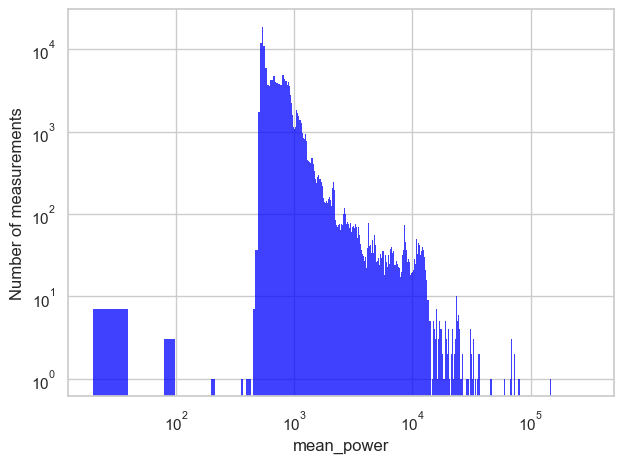

In [21]:
sns.histplot(
    total_power,
    bins = "auto",
    kde=False,
    log_scale=False,
    color='blue'  # specify the number of colors you need
)

plt.xlabel("mean_power")
plt.ylabel("Number of measurements")
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()

In [ ]:

l1 =[]
l2 = []
l1 = df_completed["num_cores_alloc"]
x = 0
for n in range (len(l1)):
     l2.append(l1.iloc[n])
        
print (max(l2))

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(l2, mean_pow, marker='o', color='b', linestyle='-')

# Adding labels and title
plt.xlabel('num_cores_alloc')
plt.ylabel('Power')
plt.title('Power vs cores')

# Display the plot
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
result = np.divide(mean_pow, l2)

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(result, bins=10000, color='blue', alpha=0.8)

# Adding labels and title
plt.xlabel('Power / cores')
plt.ylabel('Frequency')
plt.title('Histogram of Power divided by cores')
plt.xlim(0, 20)  
plt.ylim(0,5000)

# Display the plot
plt.grid(True)
plt.show()

In [ ]:
# Plot several jobs power consumption
sample = df[df.job_id.isin([3848449, 5165227, 2448430, 2652511, 8296, 5029954, 838942])].sort_values("num_nodes_alloc")




sns.histplot(power_df, x="power", hue="use_gpu")
plt.xlabel("Power consumption (W)")
plt.legend(["Cores+GPUs", "Cores"])
plt.ylabel("Number of values")
plt.yscale("log")
plt.xscale("log")
plt.xticks(plt.gca().get_xticks())
plt.tight_layout()

# Print the number of values being plotted
for gpu_usage in power_df["use_gpu"].unique():
    num_values = len(power_df[power_df["use_gpu"] == gpu_usage])
    print(f"Number of values with GPU usage {gpu_usage}: {num_values}")

##plt.savefig("plots/power_consumption_cpu_gpu_hist.png")
##plt.clf()
plt.show()


In [ ]:
power_mean = power_df['power'].mean()
power_median = power_df['power'].median()
power_std = power_df['power'].std()
power_q1 = power_df['power'].quantile(0.25)
power_q2 = power_df['power'].quantile(0.5)
power_q3 = power_df['power'].quantile(0.75)
power_q4 = power_df['power'].quantile(1)

print(f"Mean Power Consumption: {power_mean} W")
print(f"Median Power Consumption: {power_median} W")
print(f"Standard Deviation of Power Consumption: {power_std} W")
print(f"1st Quartile of Power Consumption: {power_q1} W")
print(f"2nd Quartile of Power Consumption: {power_q2} W")
print(f"3rd Quartile of Power Consumption: {power_q3} W")
print(f"4th Quartile of Power Consumption: {power_q4} W")


max_pow = max(power_df["power"])
min_pow = min(power_df["power"])
print(f" Max Pow: {max_pow}") 
print(f" Min Pow: {min_pow}")


In [ ]:
df["use_gpu"] = df.num_gpus_alloc.apply(lambda g: g > 0)
    
power_df = {"power":[], "use_gpu":[], "nodes_allocated":[]}

for pc in df[["power_consumption", "use_gpu", "num_nodes_alloc"]].values:
            
    power_df["power"] += list(pc[0])
    power_df["use_gpu"] += [pc[1]]*len(pc[0])
    power_df["nodes_allocated"] += [pc[-1]]*len(pc[0])

power_df = pd.DataFrame.from_dict(power_df)



# Print the number of values being plotted for each GPU usage category
for gpu_usage in power_df["use_gpu"].unique():
    num_values = len(power_df[power_df["use_gpu"] == gpu_usage])
    gpu_usage_label = "with" if gpu_usage else "without"
    print(f"Number of values {gpu_usage_label} GPU usage: {num_values}")



In [ ]:
sns.histplot(power_df, x="power", hue="use_gpu")
plt.xlabel("Power consumption (W)")
plt.legend(["Cores+GPUs", "Cores"])
plt.ylabel("Number of values")
plt.yscale("log")
plt.xscale("log")
plt.xticks(plt.gca().get_xticks())
plt.tight_layout()
##plt.savefig("plots/power_consumption_cpu_gpu_hist.png")
plt.clf()
plt.show()

<a id="gpu"></a>
## GPU treatment

In [7]:
l1 = df_completed["num_gpus_alloc"]
unique_values = df_completed["num_gpus_alloc"].unique()

print(sorted(unique_values))

[0, 1, 2, 3, 4, 5, 6, 8, 12, 16, 20, 24, 28, 30, 32, 36, 40, 44, 48, 50, 52, 56, 60, 64, 68, 72, 80, 88, 96, 100, 108, 112, 120, 128, 132, 140, 144, 160, 188, 192, 200, 208, 216, 224, 240, 256, 260, 288, 320, 324, 392, 400, 432, 448, 504, 512, 576, 648, 1008, 1024]


Mean gpu alloc: 12.219838056680162
Median gpu alloc: 4.0
Standard Deviation of gpu alloc: 48.92439754166929
1st Quartile of gpu alloc: 4.0
2nd Quartile of gpu allo: 4.0
3rd Quartile of Power gpu alloc: 4.0
4th Quartile of gpu alloc: 1024.0
 Max gpu: 1024
 Min gpu: 0


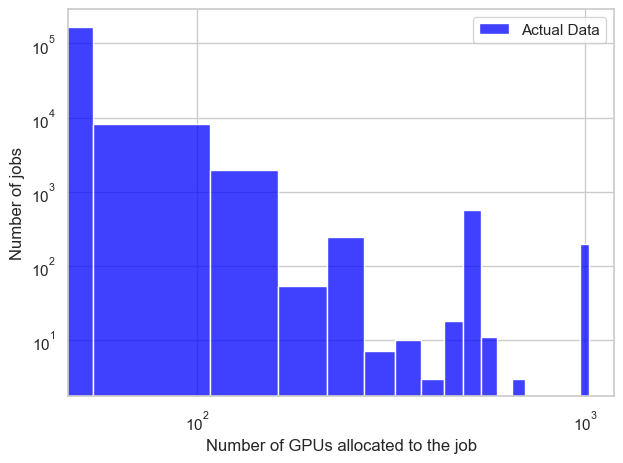

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.histplot(
    df_completed,
    x = "num_gpus_alloc",
    kde=False,
    log_scale=False,
    color='blue',
    label='Actual Data'
)

plt.xlabel("Number of GPUs allocated to the job")
plt.ylabel("Number of jobs")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.tight_layout()


gpu_mean = df_completed['num_gpus_alloc'].mean()
gpu_median = df_completed['num_gpus_alloc'].median()
gpu_std = df_completed['num_gpus_alloc'].std()
gpu_q1 = df_completed['num_gpus_alloc'].quantile(0.25)
gpu_q2 = df_completed['num_gpus_alloc'].quantile(0.5)
gpu_q3 = df_completed['num_gpus_alloc'].quantile(0.75)
gpu_q4 = df_completed['num_gpus_alloc'].quantile(1)


print(f"Mean gpu alloc: {gpu_mean}")
print(f"Median gpu alloc: {gpu_median}")
print(f"Standard Deviation of gpu alloc: {gpu_std}")
print(f"1st Quartile of gpu alloc: {gpu_q1}")
print(f"2nd Quartile of gpu allo: {gpu_q2}")
print(f"3rd Quartile of Power gpu alloc: {gpu_q3}")
print(f"4th Quartile of gpu alloc: {gpu_q4}")


max_gpu = max(df_completed['num_gpus_alloc'])
min_gpu = min(df_completed['num_gpus_alloc'])
print(f" Max gpu: {max_gpu}") 
print(f" Min gpu: {min_gpu}")

<a id="various"></a>
## Mixed data

In [41]:
l1 = df_completed["num_cores_alloc"]
l2 = df_completed["num_gpus_alloc"]
l3 = df_completed["mem_alloc"]
l4 = df_completed["run_time"]
l5 = df_completed["power_consumption"]

combined_list = list(zip(l1, l2, l3, l4, l5))


total_power_consumption = 0
total_power = []
for i in range(len(combined_list)):
    total_power_consumption = (sum(combined_list[i][4]))
    total_power.append(total_power_consumption)
    total_power_consumption=0
     

##new_list = list(zip(l1, l2, l3, l4, means))

factors = []
##for i in range(len(new_list)):
    ##factor = (combined_list[i][0] / cores_mean) * (combined_list[i][1] / gpu_mean) * \
             ##(combined_list[i][2] / mem_mean) * (combined_list[i][3] / means[i]) * \
             ##(combined_list[i][4] / total_power[i])
    ##factors.append(factor)

# Combine all values including the new factor
##new_list = list(zip(l1, l2, l3, l4, means, factors))


In [ ]:
print(new_list[100])

In [ ]:
print (combined_list[5][180294])

In [ ]:



sns.histplot(
    total_power,
    kde=False,
    bins = 1000,
    log_scale=False,
    color='blue'  # specify the number of colors you need
)

plt.xlabel("Cpu_Cycles")
plt.ylabel("Number of measurements")
plt.yscale("log")
plt.xscale("log")
plt.tight_layout()


print (len(total_power))

In [42]:

new_power = generate_power(180310)
new_instructions = generate_instructions(180310)

n = 0

relations = []
final_inst = []
for i in range(len(new_power)):
    n = total_power[i] / new_power[i]
    relations.append(n)

for i in range(len(new_instructions)):
    n = relations[i] * new_instructions[i]
    final_inst.append(n)    



<function matplotlib.pyplot.show(close=None, block=None)>

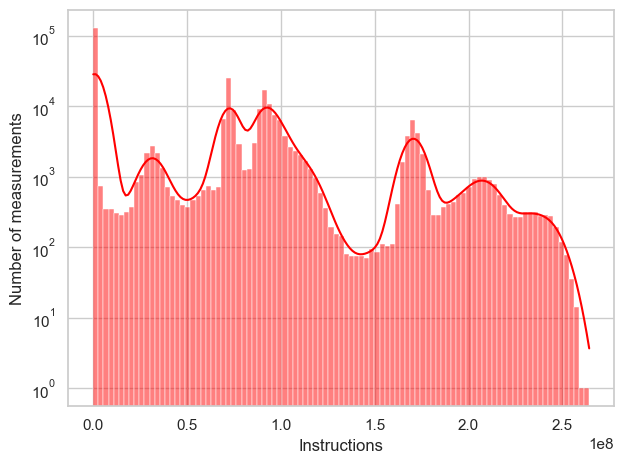

In [43]:

sns.histplot(
    instructions,
    kde=True,
    log_scale=False,
    color='red'  # specify the number of colors you need
)

plt.xlabel("Instructions")
plt.ylabel("Number of measurements")
plt.yscale("log")
plt.tight_layout()


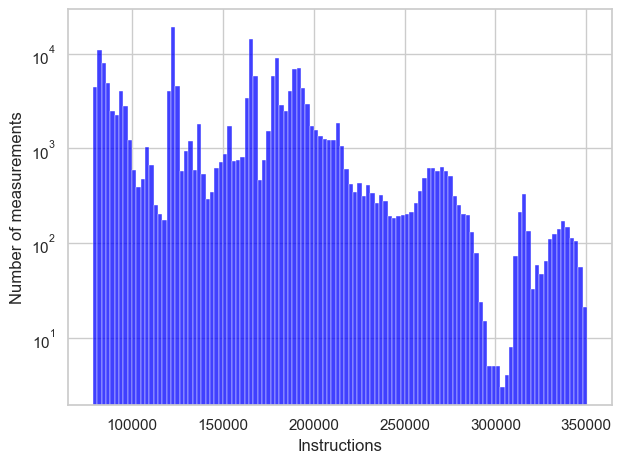

In [44]:
sns.histplot(
    new_instructions,
    kde= False,
    log_scale=False,
    color='blue'  
)
plt.xlabel("Instructions")
plt.ylabel("Number of measurements")
plt.yscale("log")
plt.tight_layout()

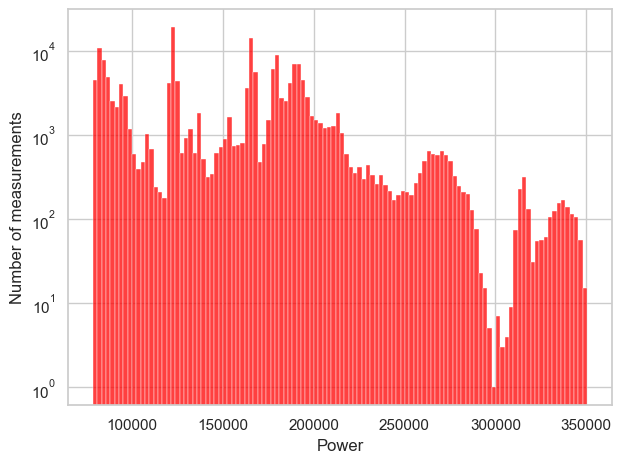

In [48]:
sns.histplot(
    new_power,
    kde=False,
    log_scale=False,
    color='red'  
)

plt.xlabel("Power")
plt.ylabel("Number of measurements")
plt.yscale("log")
plt.tight_layout()


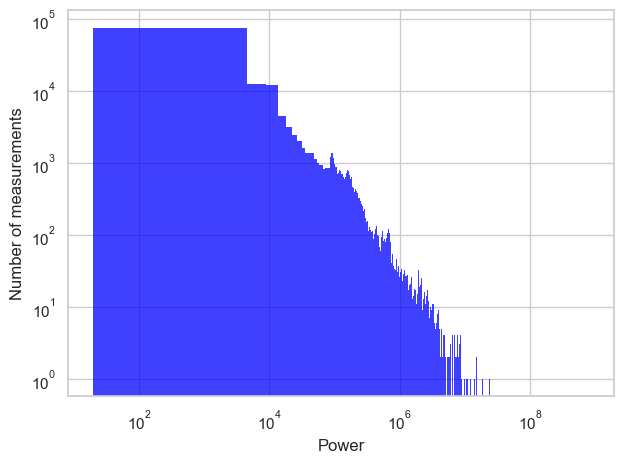

In [50]:
sns.histplot(
    total_power,
    kde=False,
    log_scale=False,
    color='blue'  
)

plt.xlabel("Power")
plt.ylabel("Number of measurements")
plt.yscale("log")
plt.xscale("log")
plt.tight_layout()

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
def load_data(path: str) -> pd.DataFrame:
    """Load the data from a parquet file.

    Args:
        path (str): Path to the parquet file.

    Returns:
        pd.DataFrame: Loaded DataFrame.
    """
    return pd.read_parquet(path)

if __name__ == "__main__":
    
    sns.set_theme(style="whitegrid")

    DATA_PATH = "C://Users/Nuno/job_table.parquet"

    df = load_data(DATA_PATH)

    df_completed = df[df['job_state'] == 'COMPLETED'].copy()  # Use copy() to explicitly create a copy

    df_completed['job_state'].replace({"OUT_OF_MEMORY": "OOM+NODE FAIL", "NODE_FAIL": "OOM+NODE FAIL"}, inplace=True)

In [3]:


def generate_power_kde(num_values, data, bandwidth=0.5):
    # Fit KDE model to the power consumption data
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(data[:, None])
    
    # Generate new samples
    new_samples = kde.sample(num_values)
    
    # Flatten the array and return as list
    return new_samples.flatten().tolist()

def plot_histogram(data, title, bins=50, color='blue'):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, color=color, edgecolor='black', alpha=0.7)
    plt.yscale("log")
    plt.title(title)
    plt.xlabel('Power Consumption')
    plt.ylabel('Frequency')
    plt.show()

power_data = df_completed["power_consumption"]

# Generate new power consumption data
num_values = 100000  # Number of new samples to generate
augmented_power_data = generate_power_kde(num_values, power_data)

# Convert to DataFrame if needed
augmented_power_df = pd.DataFrame(augmented_power_data, columns=["power_consumption"])

# Plot histograms
plot_histogram(power_data, 'Original Power Consumption Data')
plot_histogram(augmented_power_data, 'Augmented Power Consumption Data')


C:\Users\Nuno\AppData\Local\Temp\ipykernel_9608\214123969.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  kde.fit(data[:, None])


ValueError: setting an array element with a sequence.